In [1]:
#CLUSTERS	MOST IMPORTANT GENES		OTHER GENES
#Satellite cells	pax3a+ / met+	co-expression	cdh15, pax7a, wnt2, notch3
#External cell layer	pax3a+ / meox1+	co-expression	notch3
#Commited myoblasts	myod1+ and myog+		
#Spinal cord (not interesting for us)	gfap+	her4.1	
#Neural crest  (also not interesting for us)	sox10+		

import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import scanpy
import os
import requests
import pyranges as pr
import pycisTopic
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
from pycisTopic.iterative_peak_calling import *
import anndata
import pickle
import pyarrow 
import re


def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for items in my_list:
        freq[items] = my_list.count(items)
 
    for key, value in freq.items():
        print("% s : % d" % (key, value))
 

outDir="SCENIC_results_MARCH2024/"
tmpDir="/tmp/"
#ray.shutdown()
#ray.shutdown()

In [2]:
import dill
import scanpy as sc
import os
import warnings
warnings.filterwarnings("ignore")
import pandas
import pyranges
# Set stderr to null to avoid strange messages from ray
import sys
_stderr = sys.stderr
null = open(os.devnull,'wb')



In [3]:

scplus_obj = dill.load(open(os.path.join(outDir, 'scenicplus/scplus_obj.pkl'), 'rb'))

scplus_obj



SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [4]:
scplus_obj.metadata_cell['GEX_celltype'].value_counts()


cluster_0     2957
cluster_1     1616
cluster_4     1001
cluster_6      576
cluster_7      405
cluster_8      390
cluster_9      267
cluster_10     165
cluster_11     155
cluster_2      121
cluster_3      101
cluster_5       20
Name: GEX_celltype, dtype: int64

In [5]:
scplus_obj.metadata_cell


GEX_orig.ident  GEX_nCount_RNA  \
TCCGGAATCACACAGT-1-6dpf___6dpf           6dpf          2628.0   
GCTGATCCACGAACAG-1-6dpf___6dpf           6dpf          1546.0   
AGCTAACTCCTCATGC-1-6dpf___6dpf           6dpf          3087.0   
GGCTGGTTCATTACTC-1-4dpf___4dpf           4dpf          5836.0   
CGATCCTTCTCACATT-1-2dpf___2dpf           2dpf           469.0   
...                                       ...             ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf           4dpf           453.0   
TGCTAACAGCGGGCAA-1-2dpf___2dpf           2dpf           821.0   
GCCTAATAGTAACCAC-1-6dpf___6dpf           6dpf          4113.0   
CGGTGAACACTTCATC-1-2dpf___2dpf           2dpf          1067.0   
ACCTACCTCCTTGAGG-1-2dpf___2dpf           2dpf           654.0   

                                GEX_nFeature_RNA  GEX_percent.mt  \
TCCGGAATCACACAGT-1-6dpf___6dpf             936.0        8.485540   
GCTGATCCACGAACAG-1-6dpf___6dpf             729.0        1.681759   
AGCTAACTCCTCATGC-1-6dpf___6dpf            1351.0        0.907029   
GGCTGGTTCATTACTC-1-4dpf___4dpf            2256.0        1.353667   
CGATCCTTCTCACATT-1-2dpf___2dpf             374.0        1.279318   
...                                          ...             ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf             292.0        9.050773   
TGCTAACAGCGGGCAA-1-2dpf___2dpf             573.0        1.339829   
GCCTAATAGTAACCAC-1-6dpf___6dpf            1219.0        1.483102   
CGGTGAACACTTCATC-1-2dpf___2dpf             622.0        1.593252   
ACCTACCTCCTTGAGG-1-2dpf___2dpf             471.0        1.223242   

                                GEX_nCount_ATAC  GEX_nFeature_ATAC  \
TCCGGAATCACACAGT-1-6dpf___6dpf           8304.0             3815.0   
GCTGATCCACGAACAG-1-6dpf___6dpf           5327.0             2519.0   
AGCTAACTCCTCATGC-1-6dpf___6dpf           9884.0             4551.0   
GGCTGGTTCATTACTC-1-4dpf___4dpf          18799.0             7381.0   
CGATCCTTCTCACATT-1-2dpf___2dpf           4025.0             2090.0   
...                                         ...                ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf          20726.0             8666.0   
TGCTAACAGCGGGCAA-1-2dpf___2dpf           6505.0             3283.0   
GCCTAATAGTAACCAC-1-6dpf___6dpf           5522.0             2616.0   
CGGTGAACACTTCATC-1-2dpf___2dpf           1610.0              839.0   
ACCTACCTCCTTGAGG-1-2dpf___2dpf           6691.0             3394.0   

                               GEX_condition  GEX_nCount_SCT  \
TCCGGAATCACACAGT-1-6dpf___6dpf          6dpf          2242.0   
GCTGATCCACGAACAG-1-6dpf___6dpf          6dpf          1781.0   
AGCTAACTCCTCATGC-1-6dpf___6dpf          6dpf          2407.0   
GGCTGGTTCATTACTC-1-4dpf___4dpf          4dpf          2453.0   
CGATCCTTCTCACATT-1-2dpf___2dpf          2dpf          1404.0   
...                                      ...             ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf          4dpf          1411.0   
TGCTAACAGCGGGCAA-1-2dpf___2dpf          2dpf          1734.0   
GCCTAATAGTAACCAC-1-6dpf___6dpf          6dpf          2466.0   
CGGTGAACACTTCATC-1-2dpf___2dpf          2dpf          1689.0   
ACCTACCTCCTTGAGG-1-2dpf___2dpf          2dpf          1575.0   

                                GEX_nFeature_SCT  GEX_SCT.weight  ...  \
TCCGGAATCACACAGT-1-6dpf___6dpf             936.0        0.519719  ...   
GCTGATCCACGAACAG-1-6dpf___6dpf             729.0        0.666255  ...   
AGCTAACTCCTCATGC-1-6dpf___6dpf            1348.0        0.399466  ...   
GGCTGGTTCATTACTC-1-4dpf___4dpf            1498.0        0.495727  ...   
CGATCCTTCTCACATT-1-2dpf___2dpf             435.0        0.625885  ...   
...                                          ...             ...  ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf             387.0        0.149514  ...   
TGCTAACAGCGGGCAA-1-2dpf___2dpf             583.0        0.596875  ...   
GCCTAATAGTAACCAC-1-6dpf___6dpf            1140.0        0.590437  ...   
CGGTGAACACTTCATC-1-2dpf___2dpf             624.0        0.513977  ...   
ACCTACCTCCTTGAGG-1-2

In [6]:
set(scplus_obj.uns['eRegulon_metadata']['Region_signature_name'])

{'atf3_+_+_(472r)',
 'atf3_extended_+_+_(201r)',
 'atf3_extended_+_-_(12r)',
 'atf4a_+_+_(150r)',
 'atf4a_+_-_(56r)',
 'atf4a_extended_+_+_(150r)',
 'atf4a_extended_+_-_(56r)',
 'atf4b_+_+_(177r)',
 'atf4b_extended_+_+_(177r)',
 'atf6_+_+_(54r)',
 'bach2b_+_+_(51r)',
 'bach2b_extended_+_+_(51r)',
 'bnc2_+_+_(30r)',
 'bnc2_extended_+_+_(20r)',
 'cebpa_+_+_(58r)',
 'cebpa_extended_+_+_(58r)',
 'cebpb_+_+_(134r)',
 'cebpb_extended_+_+_(134r)',
 'cebpd_+_+_(115r)',
 'cebpd_extended_+_+_(115r)',
 'crebl2_extended_+_-_(17r)',
 'crebzf_+_+_(44r)',
 'crebzf_extended_+_+_(44r)',
 'crema_+_+_(236r)',
 'crema_extended_+_+_(245r)',
 'ctcf_extended_+_-_(10r)',
 'cux1a_+_+_(95r)',
 'cux1a_extended_+_+_(95r)',
 'dbpb_+_+_(19r)',
 'dbpb_extended_+_+_(19r)',
 'ddit3_+_+_(12r)',
 'ddit3_extended_+_+_(12r)',
 'egr1_+_+_(219r)',
 'egr1_+_-_(34r)',
 'egr1_extended_+_+_(219r)',
 'egr1_extended_+_-_(34r)',
 'erf_+_+_(46r)',
 'erf_extended_+_+_(50r)',
 'erfl3_+_+_(222r)',
 'erfl3_+_-_(26r)',
 'erfl3_extended_

In [7]:
from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj)

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


In [8]:

scplus_obj.uns['eRegulon_metadata']

Region_signature_name       Gene_signature_name     TF is_extended  \
0            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
1            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
2            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
3            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
4            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
..                       ...                       ...    ...         ...   
7   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
8   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
9   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
10  zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
11  zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   

                  Region   Gene  R2G_importance   R2G_rho  \
0   13:25487319-25487819  tial1        0.089370  0.107261   
1   13:25484434-25484934  tial1        0.062641  0.107074   
2   13:25486347-25486847  tial1        0.060369  0.067596   
3   13:25489086-25489586  tial1        0.092455  0.087212   
4   19:10196140-10196640   dbpa        0.102981  0.110942   
..                   ...    ...             ...       ...   
7    4:16884310-16884810  tmpoa        0.075031 -0.099090   
8     21:5924493-5924993  rexo4        0.054471 -0.102886   
9    5:36314680-36315180  efnb1        0.027394 -0.071053   
10   3:13196677-13197177   sun1        0.018787 -0.061842   
11    15:1821486-1821986  taf15        0.060077 -0.091475   

    R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0               0.009586                  0.009586         0.861591   
1               0.006707                  0.006707         0.861591   
2               0.004081                  0.004081         0.861591   
3               0.008063                  0.008063         0.861591   
4               0.011425                  0.011425         0.368966   
..                   ...                       ...              ...   
7              -0.007435                  0.007435         0.579173   
8              -0.005604                  0.005604         2.182333   
9              -0.001946                  0.001946         0.592602   
10             -0.001162                  0.001162         0.899646   
11             -0.005496                  0.005496         0.446440   

    TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                 1  0.252612                   0.217648   
1                 1  0.252612                   0.217648   
2                 1  0.252612                   0.217648   
3                 1  0.252612                   0.217648   
4                 1  0.139502                   0.051471   
..              ...       ...                        ...   
7                 1  0.110439                   0.063963   
8                 1  0.241762                   0.527605   
9                 1  0.287634                   0.170453   
10                1  0.277533                   0.249681   
11                1  0.267970                   0.119632   

    TF2G_importance_x_rho  
0                0.217648  
1                0.217648  
2                0.217648  
3                0.217648  
4                0.051471  
..                    ...  
7                0.063963  
8                0.527605  
9                0.170453  
10               0.249681  
11               0.119632  

[20910 rows x 15 columns]

In [9]:
scplus_obj.uns['eRegulon_metadata_filtered'].head()


Region_signature_name Gene_signature_name    TF is_extended  \
0         atf3_+_(472r)       atf3_+_(294g)  atf3       False   
1         atf3_+_(472r)       atf3_+_(294g)  atf3       False   
2         atf3_+_(472r)       atf3_+_(294g)  atf3       False   
3         atf3_+_(472r)       atf3_+_(294g)  atf3       False   
4         atf3_+_(472r)       atf3_+_(294g)  atf3       False   

                 Region   Gene  R2G_importance   R2G_rho  \
0  13:25487319-25487819  tial1        0.089370  0.107261   
1  13:25484434-25484934  tial1        0.062641  0.107074   
2  13:25486347-25486847  tial1        0.060369  0.067596   
3  13:25489086-25489586  tial1        0.092455  0.087212   
4  19:10196140-10196640   dbpa        0.102981  0.110942   

   R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0              0.009586                  0.009586         0.861591   
1              0.006707                  0.006707         0.861591   
2              0.004081                  0.004081         0.861591   
3              0.008063                  0.008063         0.861591   
4              0.011425                  0.011425         0.368966   

   TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                1  0.252612                   0.217648   
1                1  0.252612                   0.217648   
2                1  0.252612                   0.217648   
3                1  0.252612                   0.217648   
4                1  0.139502                   0.051471   

   TF2G_importance_x_rho Consensus_name  
0               0.217648       atf3_+_+  
1               0.217648       atf3_+_+  
2               0.217648       atf3_+_+  
3               0.217648       atf3_+_+  
4               0.051471       atf3_+_+

In [10]:
scplus_obj.uns['eRegulon_metadata_filtered'].to_csv(r'SCENIC_results_MARCH2024//eRegulon_metadata_filtered.csv')


In [11]:
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join(outDir, 'scenicplus/region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join(outDir, 'scenicplus/gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.05,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.05,
                normalize= False,
                n_cpu = 5)



In [12]:
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures',
                key_added = 'eRegulon_AUC',
                enrichment_type= 'region',
                auc_threshold = 0.05,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures',
                key_added = 'eRegulon_AUC',
                enrichment_type = 'gene',
                auc_threshold = 0.05,
                normalize= False,
                n_cpu = 5)

In [13]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

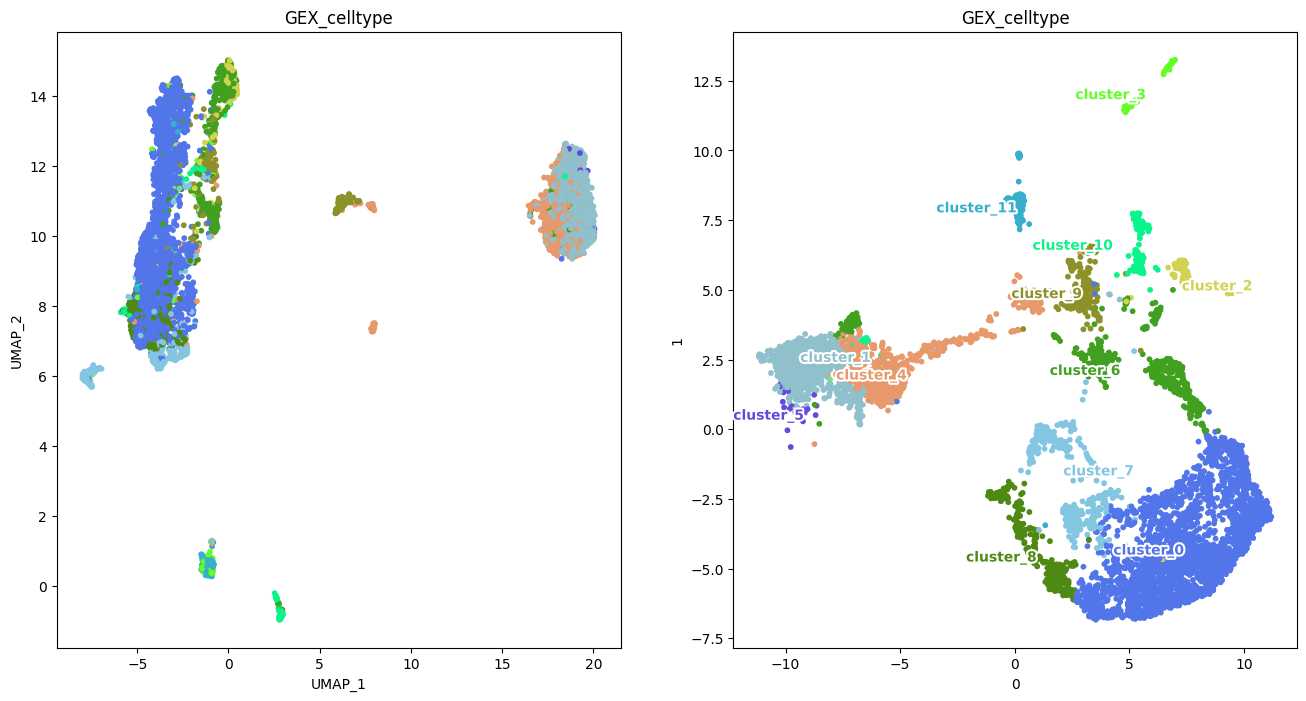

In [14]:
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(ncols=2, figsize = (16, 8))
plot_metadata_given_ax(
    scplus_obj=scplus_obj,
    ax = axs[0],
    reduction_name = 'eRegulons_UMAP',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)

)
plot_metadata_given_ax(
    scplus_obj=scplus_obj,
    ax = axs[1],
    reduction_name = 'GEX_X_wnn.umap',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)
   
)

plt.show()



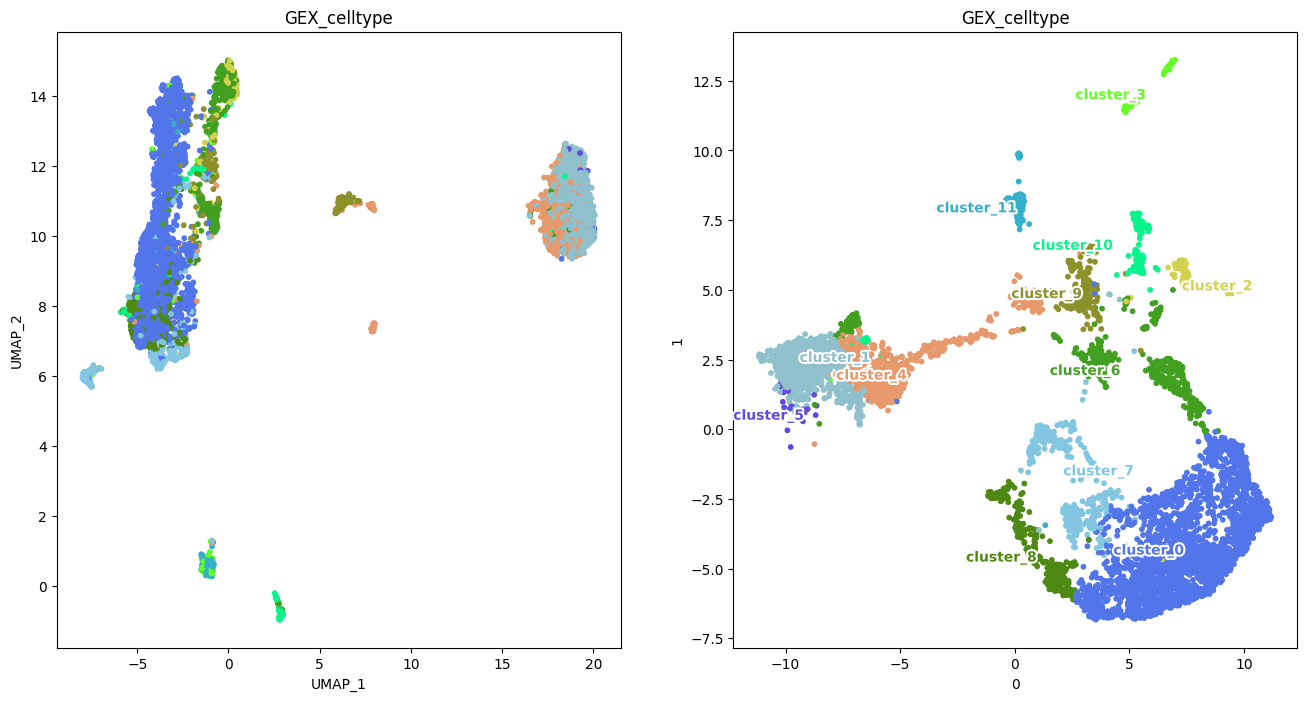

In [15]:

fig, axs = plt.subplots(ncols=2, figsize = (16, 8))
plot_metadata_given_ax(
    scplus_obj=scplus_obj,
    ax = axs[0],
    reduction_name = 'eRegulons_UMAP',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)

)
plot_metadata_given_ax(
    scplus_obj=scplus_obj,
    ax = axs[1],
    reduction_name = 'GEX_X_wnn.umap',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)
   
)
plt.show()





In [16]:
scplus_obj


SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [17]:
set(scplus_obj.uns['eRegulon_metadata_filtered']['Region_signature_name'])

{'atf3_+_(472r)',
 'atf4a_+_(150r)',
 'atf4b_+_(177r)',
 'atf6_+_(54r)',
 'bach2b_+_(51r)',
 'bnc2_+_(30r)',
 'cebpa_+_(58r)',
 'cebpb_+_(134r)',
 'cebpd_+_(115r)',
 'crebzf_+_(44r)',
 'crema_+_(236r)',
 'cux1a_+_(95r)',
 'dbpb_+_(19r)',
 'ddit3_+_(12r)',
 'egr1_+_(219r)',
 'erf_+_(46r)',
 'erfl3_+_(222r)',
 'fosab_+_(286r)',
 'fosl1a_+_(541r)',
 'fosl2_+_(397r)',
 'foxo1a_+_(128r)',
 'foxo1b_+_(18r)',
 'gatad2ab_+_(26r)',
 'grhl1_+_(53r)',
 'her12_+_(9r)',
 'her9_extended_+_(167r)',
 'hey1_+_(51r)',
 'hmga2_+_(14r)',
 'hoxa13a_+_(38r)',
 'hoxb13a_+_(29r)',
 'hoxc13a_+_(17r)',
 'hoxc13b_+_(24r)',
 'hoxd3a_+_(18r)',
 'jun_+_(46r)',
 'junba_+_(360r)',
 'junbb_+_(31r)',
 'jund_+_(343r)',
 'klf12a_+_(65r)',
 'klf2a_+_(13r)',
 'klf2b_extended_+_(97r)',
 'klf3_+_(32r)',
 'klf6a_+_(243r)',
 'klf7b_+_(185r)',
 'lef1_+_(42r)',
 'mbd2_+_(24r)',
 'mef2aa_+_(227r)',
 'mef2ca_+_(189r)',
 'mef2cb_+_(214r)',
 'mef2d_+_(210r)',
 'meis1b_+_(280r)',
 'myod1_+_(392r)',
 'myog_+_(178r)',
 'nfatc1_+_(39r)'

In [18]:
set(scplus_obj.uns['eRegulon_metadata']['Region_signature_name'])

{'atf3_+_+_(472r)',
 'atf3_extended_+_+_(201r)',
 'atf3_extended_+_-_(12r)',
 'atf4a_+_+_(150r)',
 'atf4a_+_-_(56r)',
 'atf4a_extended_+_+_(150r)',
 'atf4a_extended_+_-_(56r)',
 'atf4b_+_+_(177r)',
 'atf4b_extended_+_+_(177r)',
 'atf6_+_+_(54r)',
 'bach2b_+_+_(51r)',
 'bach2b_extended_+_+_(51r)',
 'bnc2_+_+_(30r)',
 'bnc2_extended_+_+_(20r)',
 'cebpa_+_+_(58r)',
 'cebpa_extended_+_+_(58r)',
 'cebpb_+_+_(134r)',
 'cebpb_extended_+_+_(134r)',
 'cebpd_+_+_(115r)',
 'cebpd_extended_+_+_(115r)',
 'crebl2_extended_+_-_(17r)',
 'crebzf_+_+_(44r)',
 'crebzf_extended_+_+_(44r)',
 'crema_+_+_(236r)',
 'crema_extended_+_+_(245r)',
 'ctcf_extended_+_-_(10r)',
 'cux1a_+_+_(95r)',
 'cux1a_extended_+_+_(95r)',
 'dbpb_+_+_(19r)',
 'dbpb_extended_+_+_(19r)',
 'ddit3_+_+_(12r)',
 'ddit3_extended_+_+_(12r)',
 'egr1_+_+_(219r)',
 'egr1_+_-_(34r)',
 'egr1_extended_+_+_(219r)',
 'egr1_extended_+_-_(34r)',
 'erf_+_+_(46r)',
 'erf_extended_+_+_(50r)',
 'erfl3_+_+_(222r)',
 'erfl3_+_-_(26r)',
 'erfl3_extended_

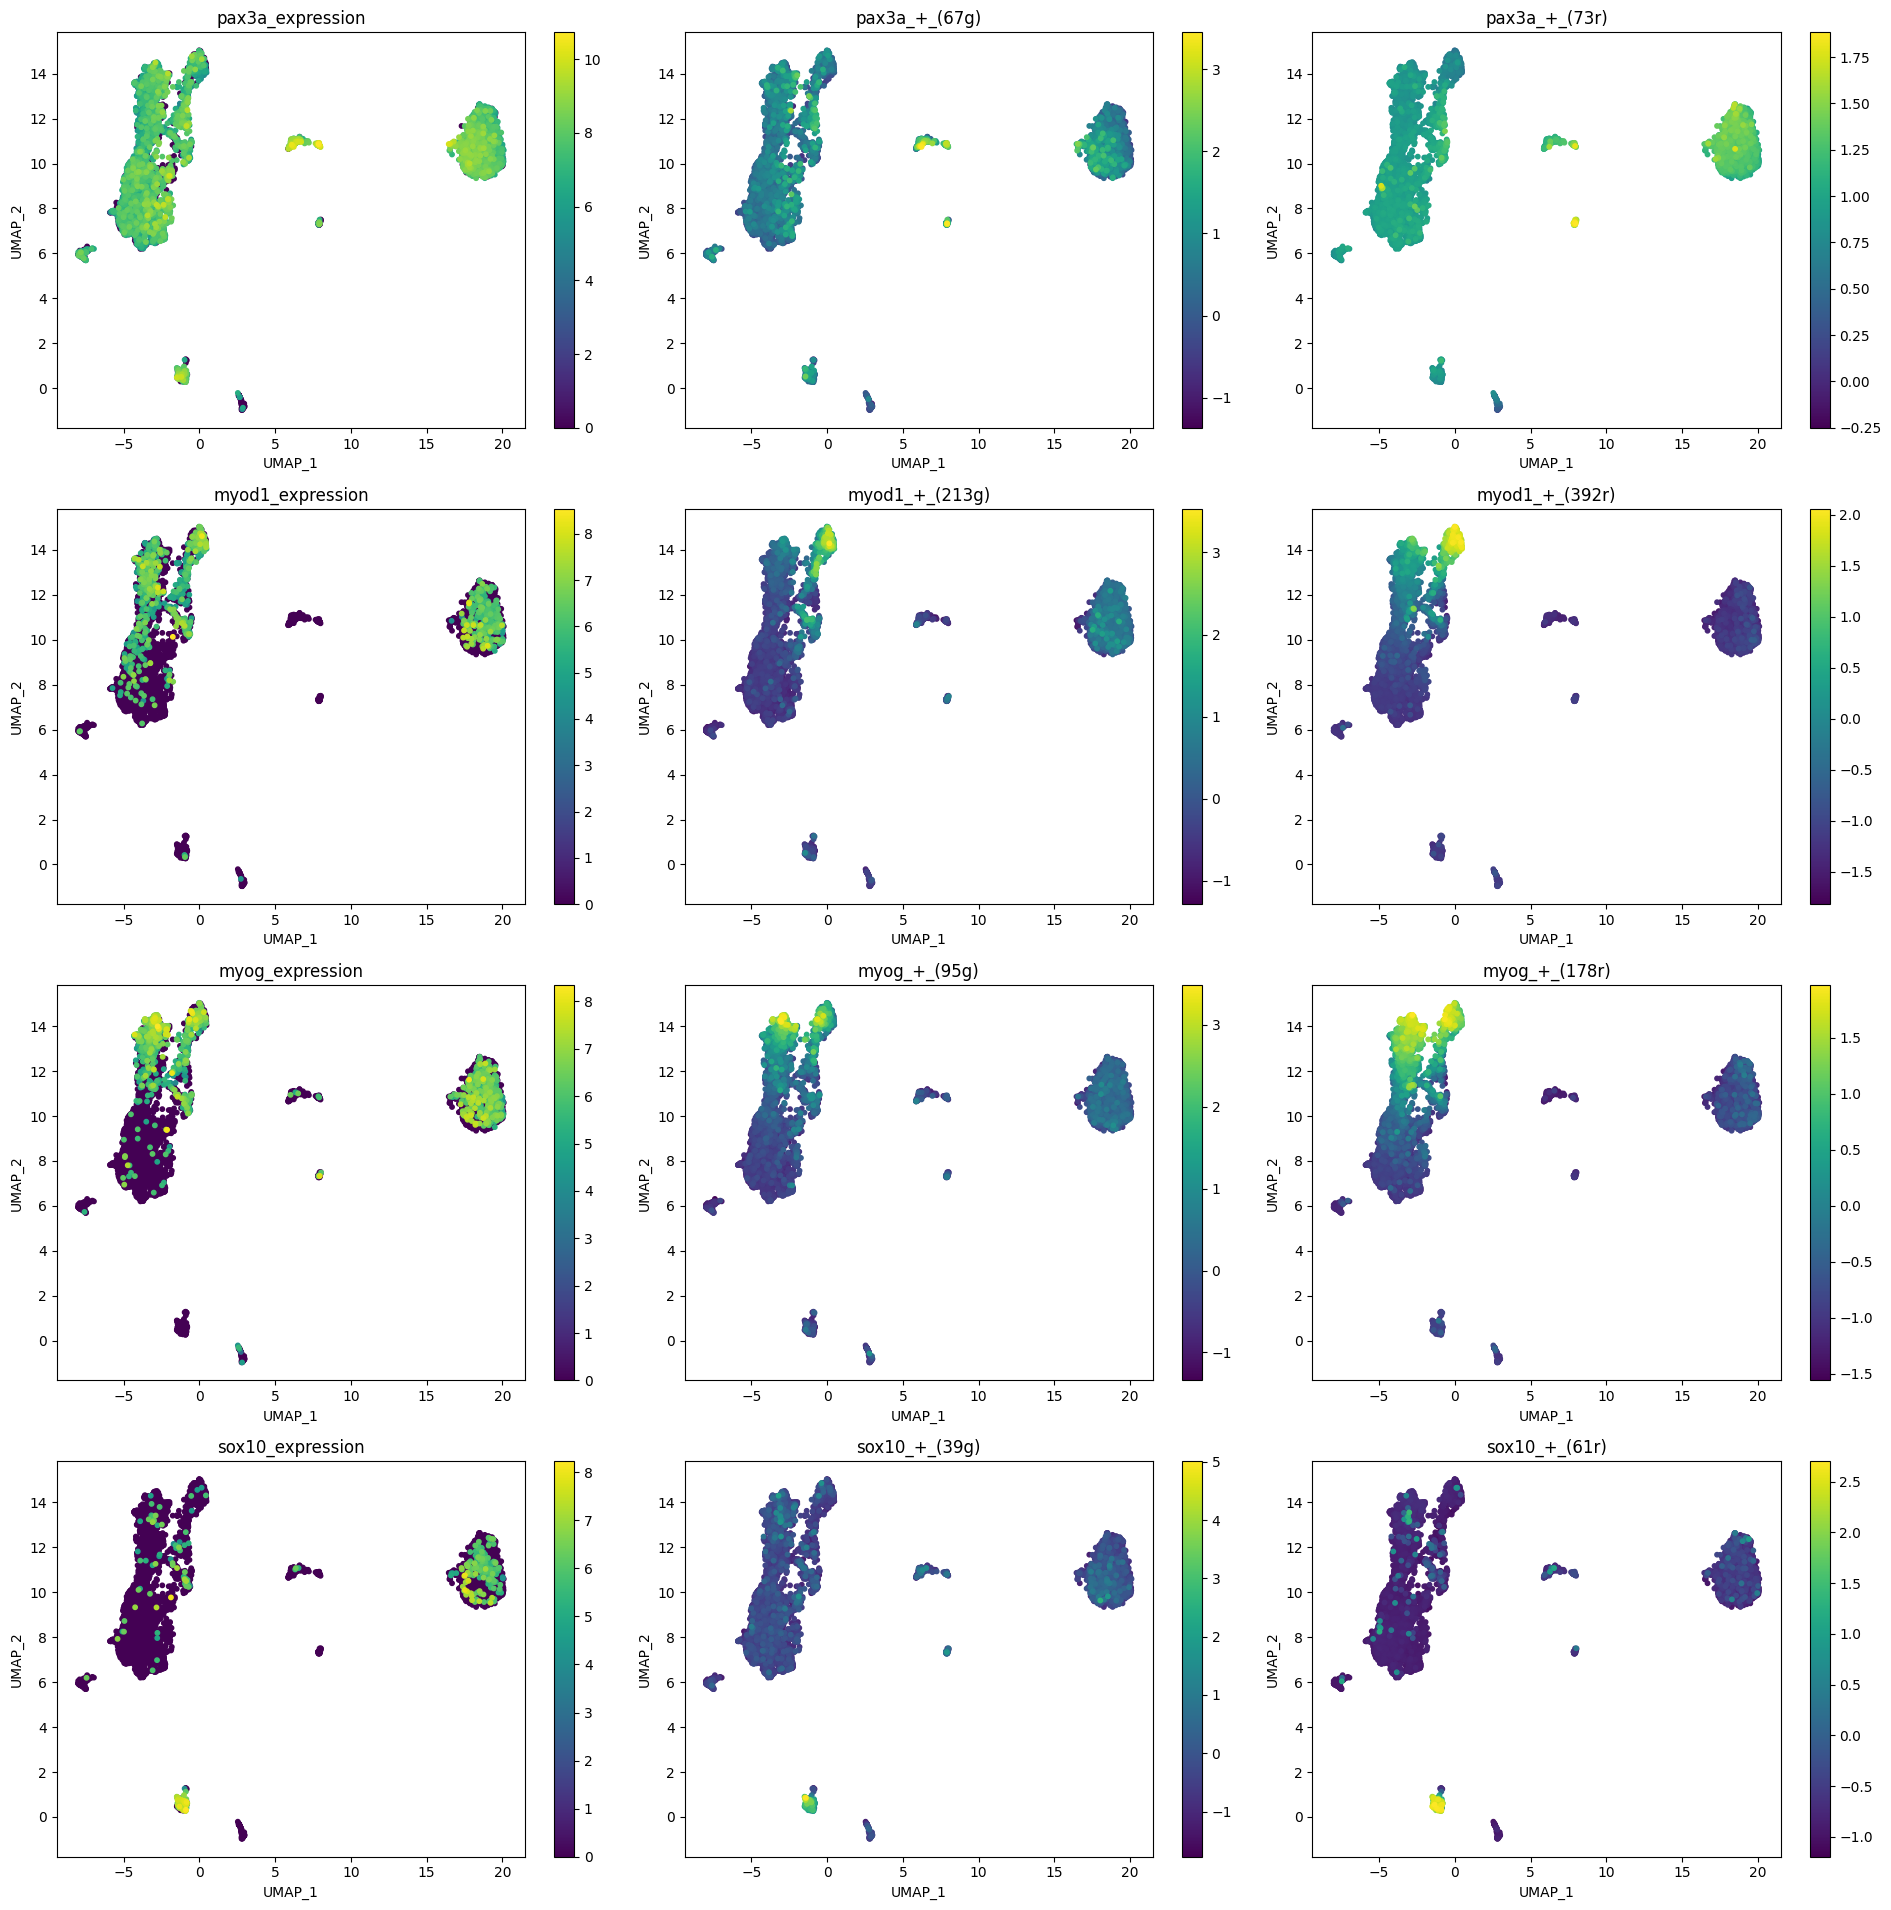

In [19]:
searchfor=['pax3a_+','myod1_+','myog_+','sox10_+','met_+','cdh15_+','pax7a_+','wnt2_+','notch3_+','gfap_+','boc_+','cdon_+','dhh_+',
           'gas1a_+','gas1b_+','gli1_+','gli2a_+','gli2b_+','gli3_+','hhip_+','hhipl1_+','hhipl2_+','ihha_+','ihhb_+','kif7_+',
           'mir214a_+','ptch1_+','ptch2_+','scube2_+','shha_+','shhb_+','si:ch211-136a13.1_+','smo_+','sufu_+']

from scenicplus.dimensionality_reduction import plot_eRegulon
plot_eRegulon(
    scplus_obj = scplus_obj,
    reduction_name = 'eRegulons_UMAP',
    selected_regulons = ['pax3a_+','myod1_+','myog_+','sox10_+'],
    scale = True,
    auc_key = 'eRegulon_AUC_filtered',
    save= outDir + 'visualization/plot_eRegulonUMAP_genes_interest.pdf')




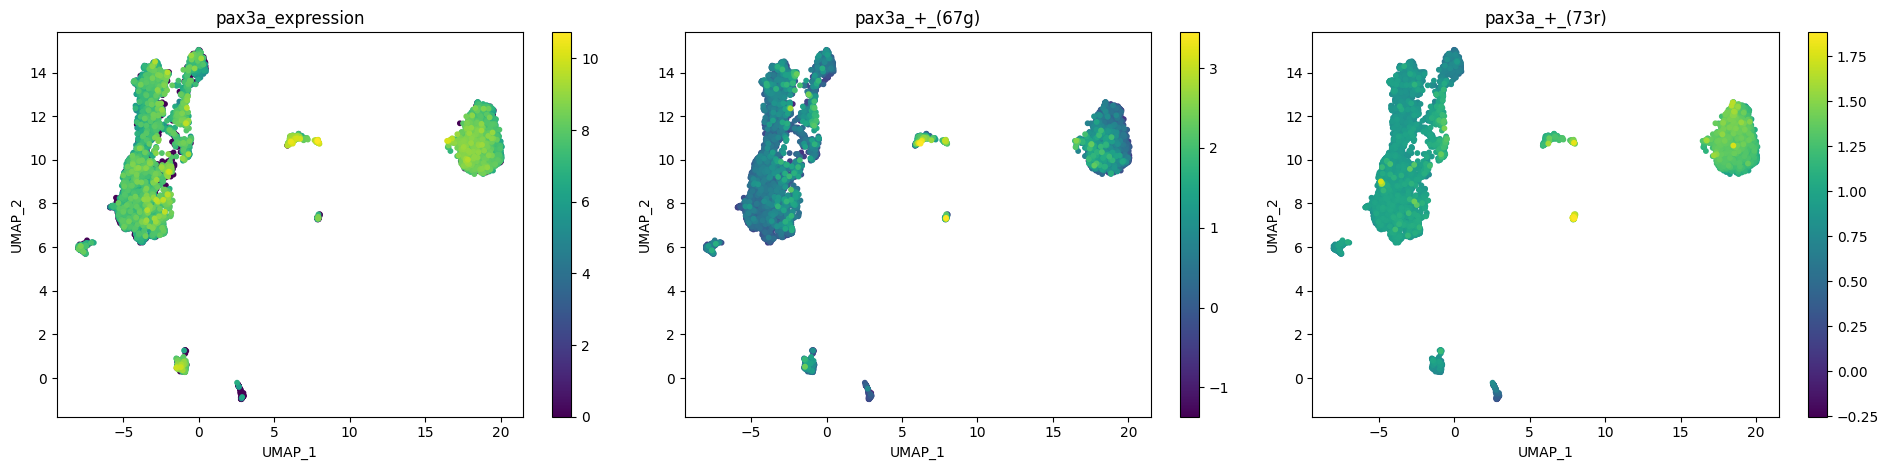

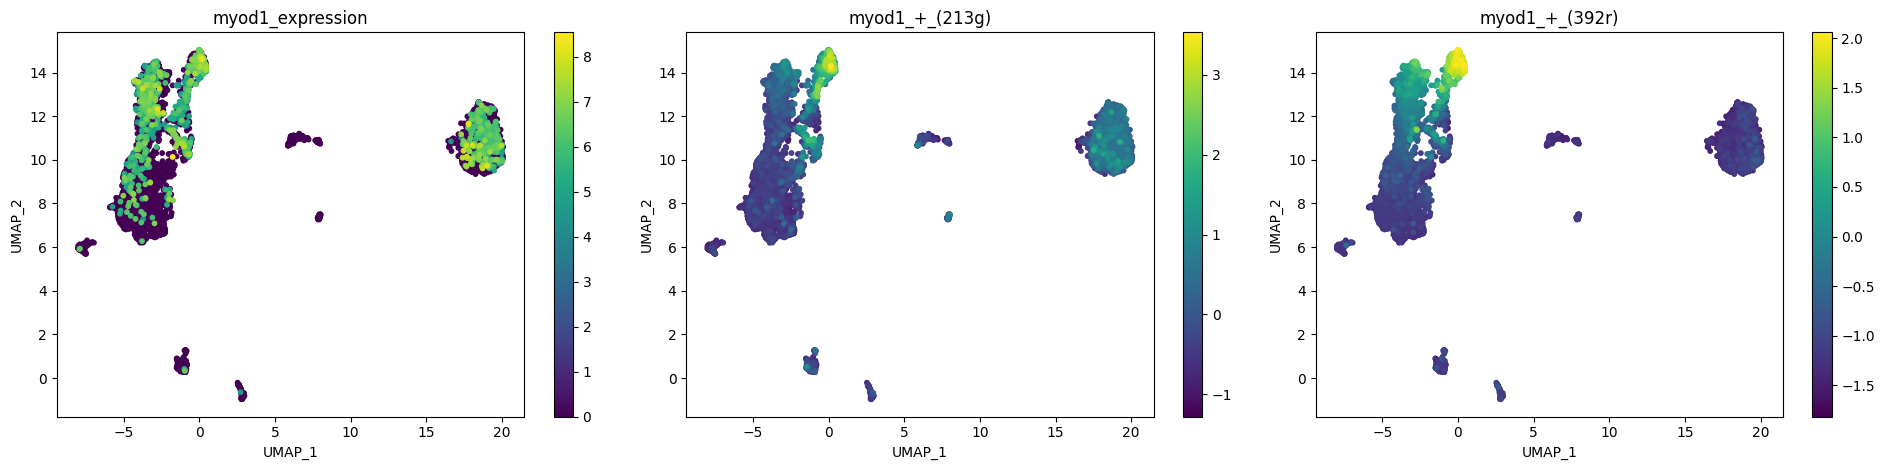

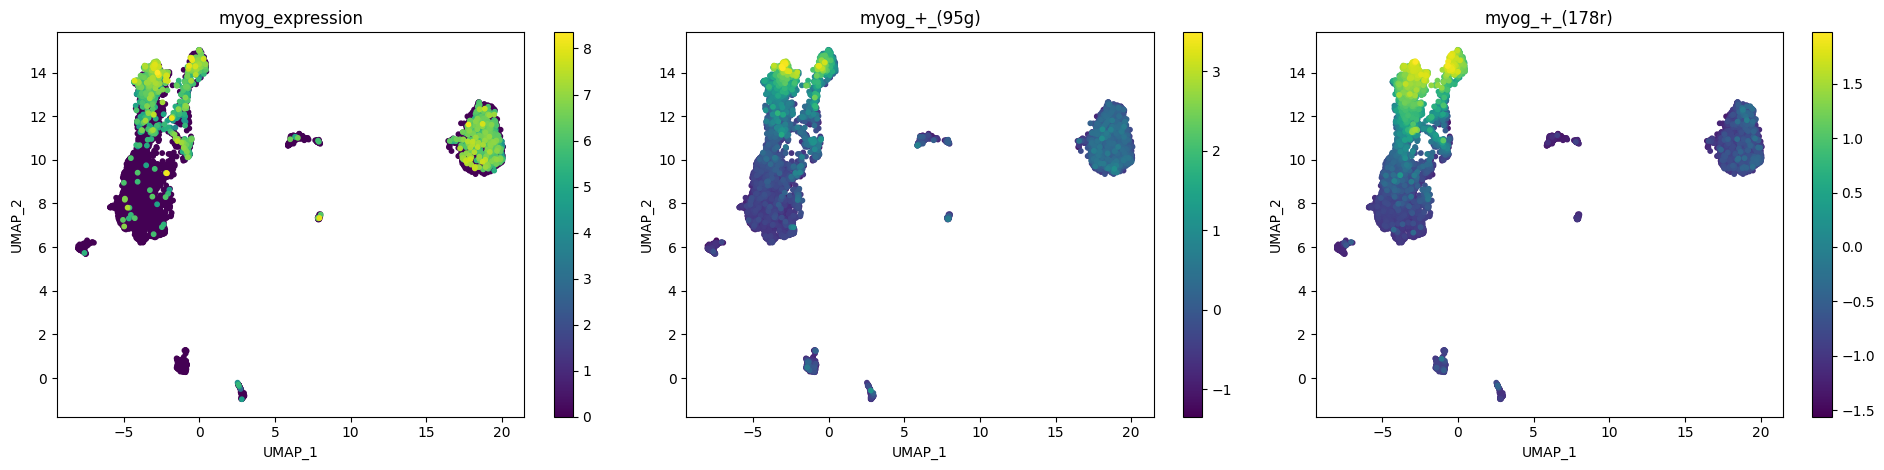

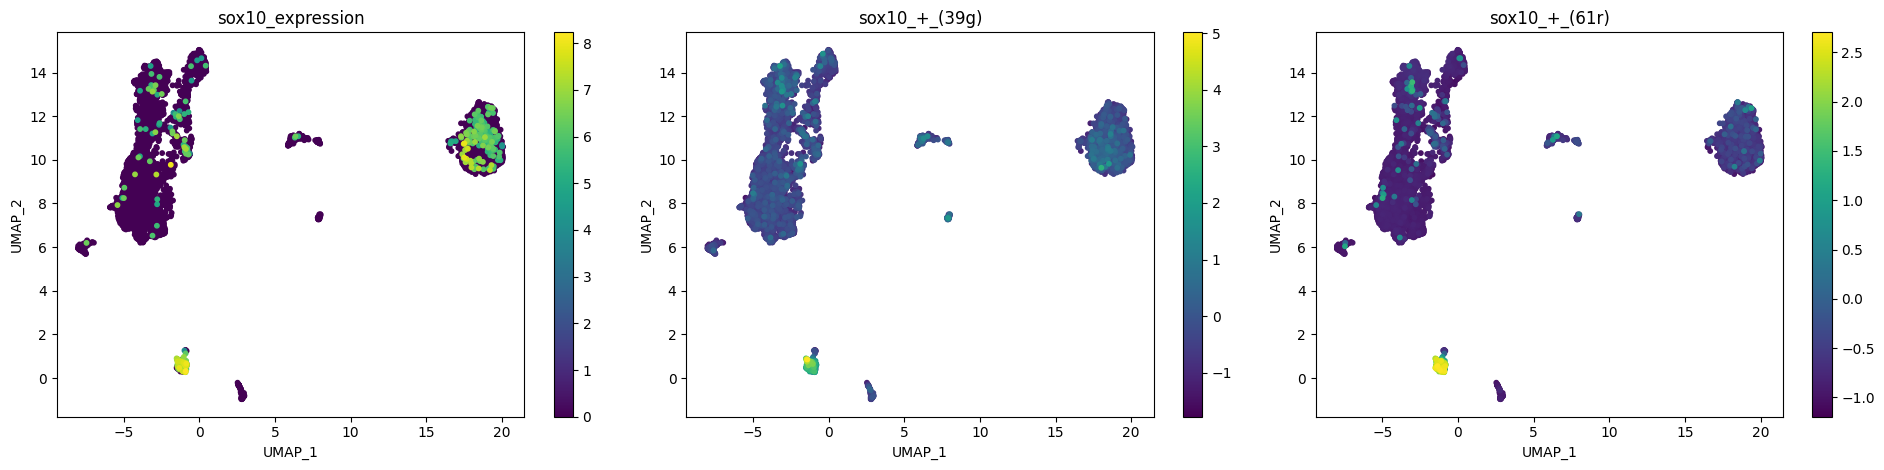

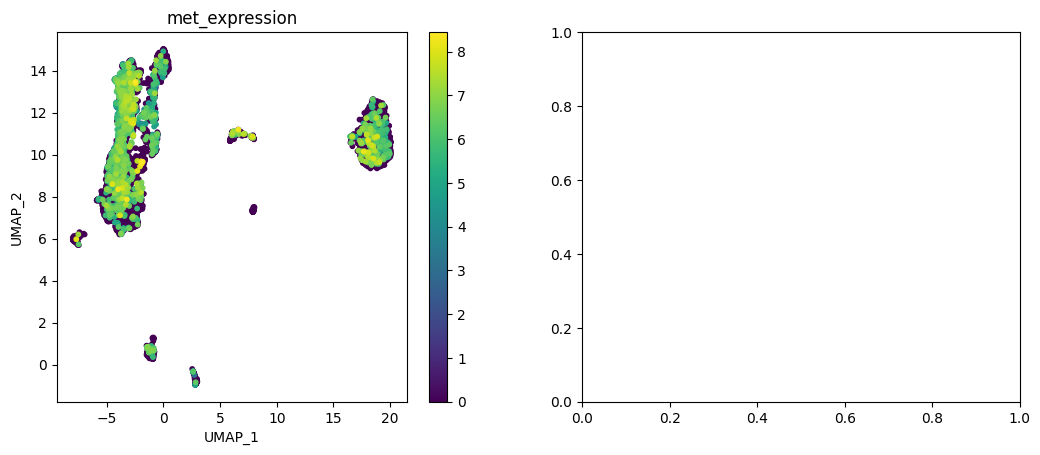

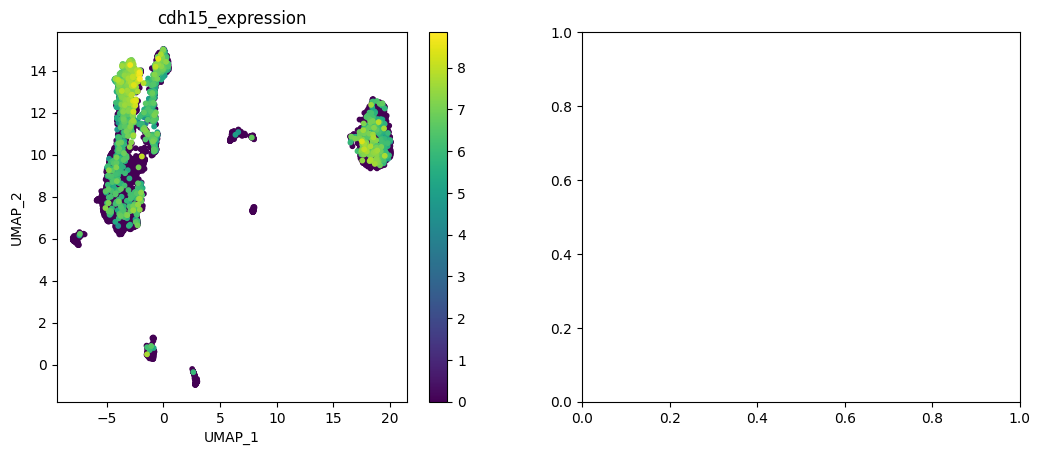

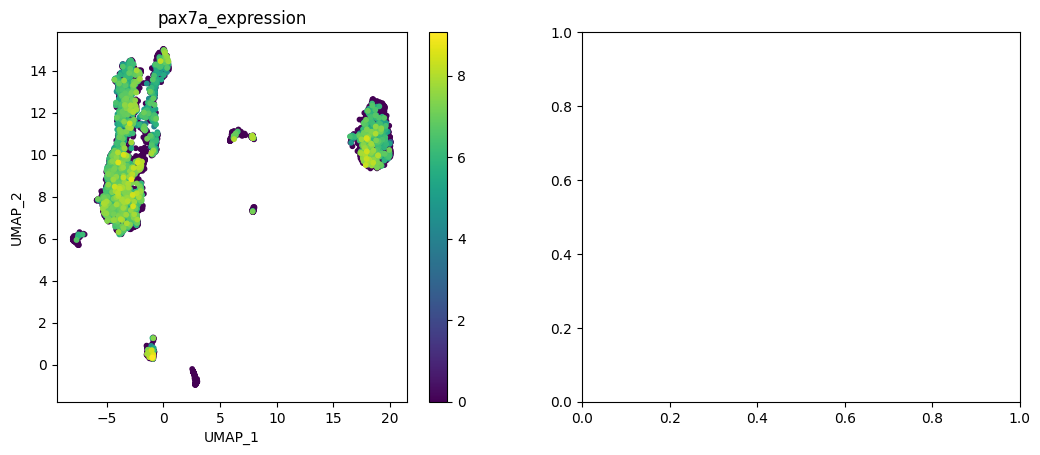

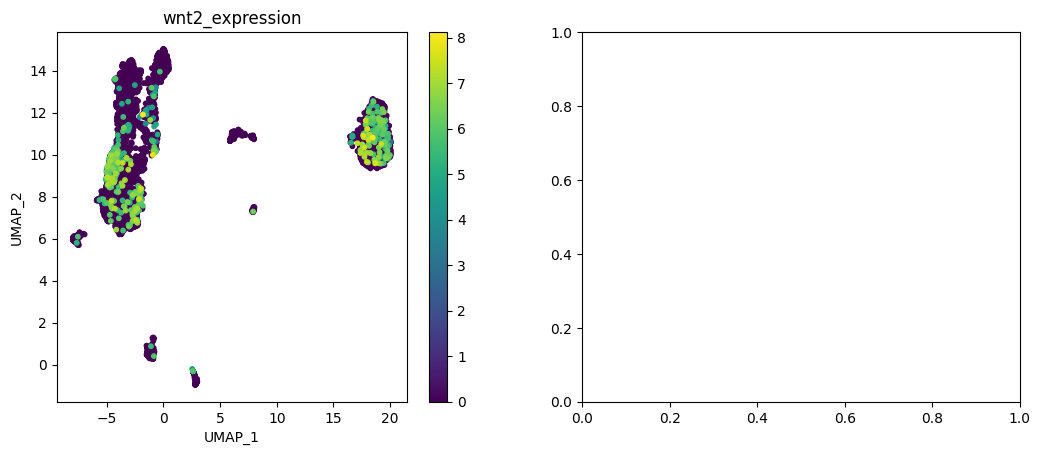

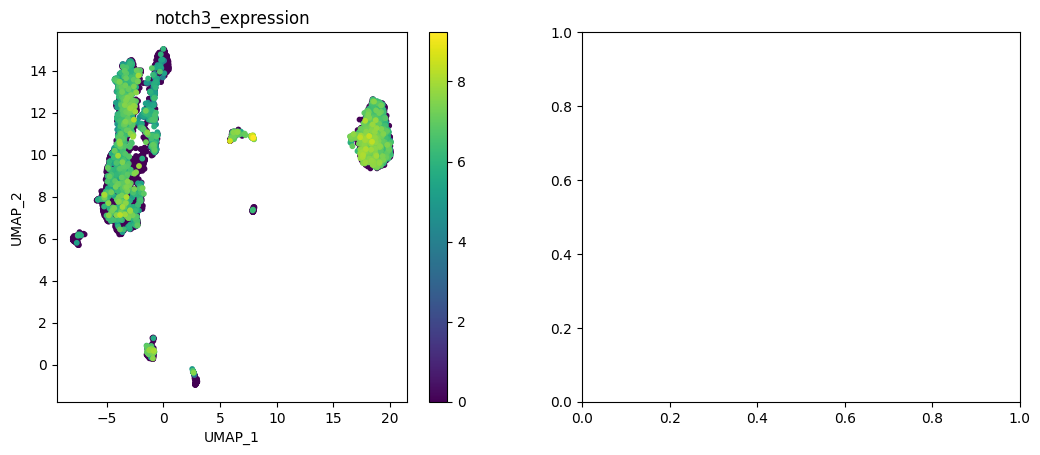

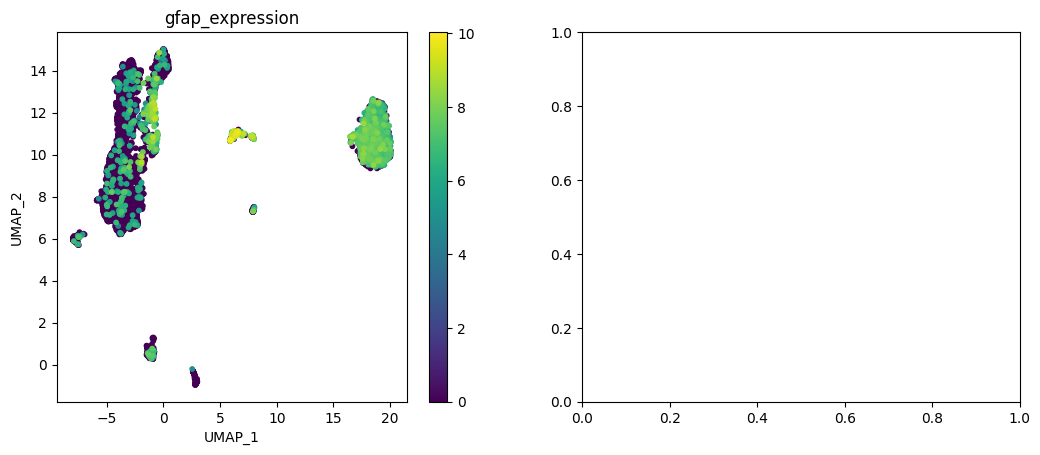

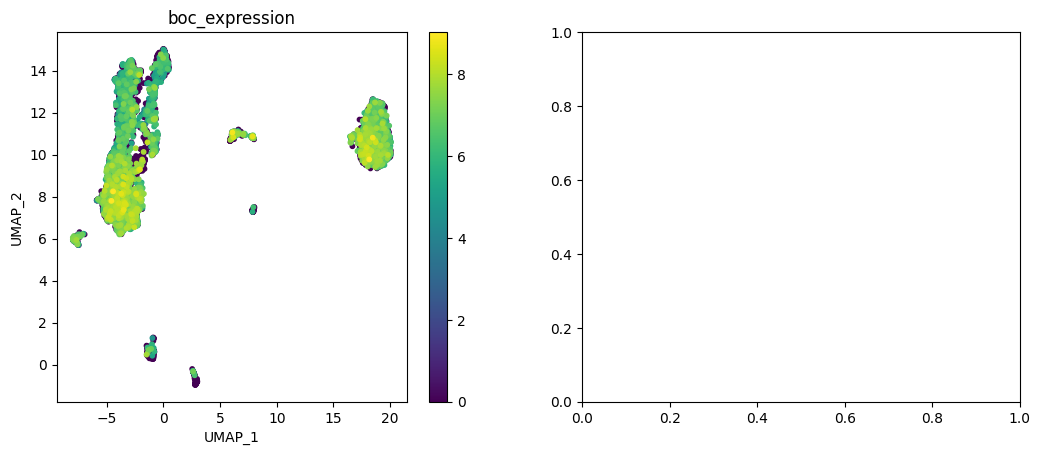

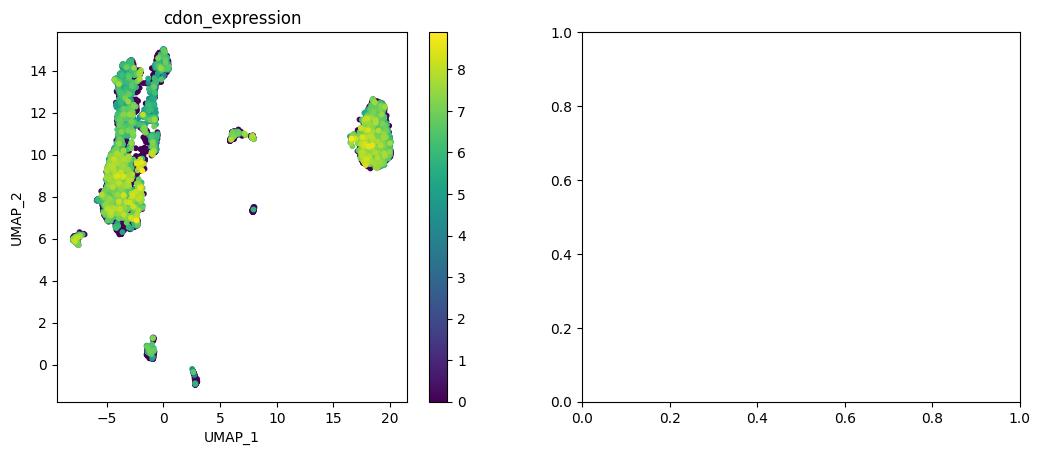

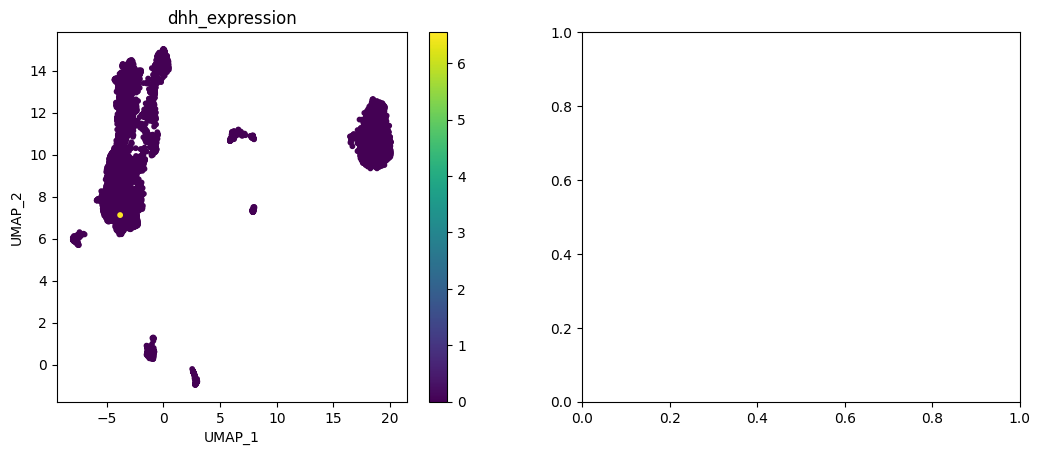

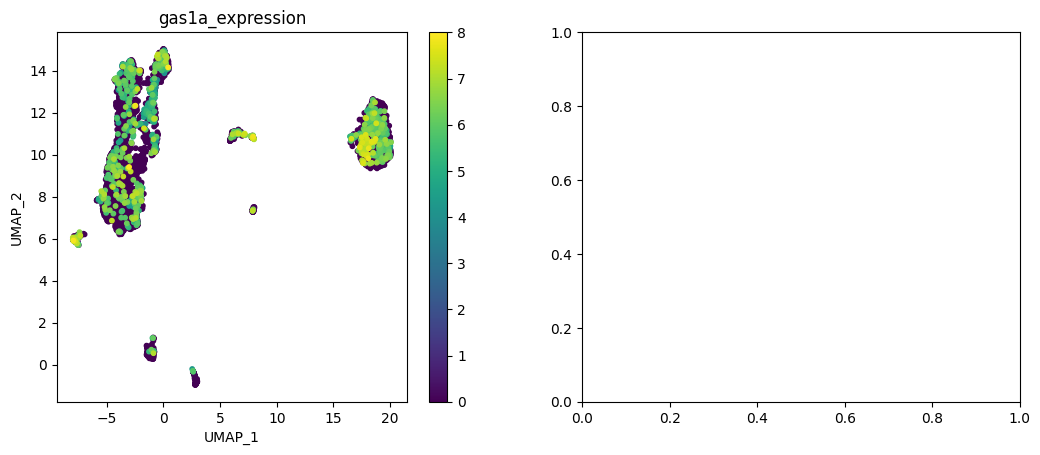

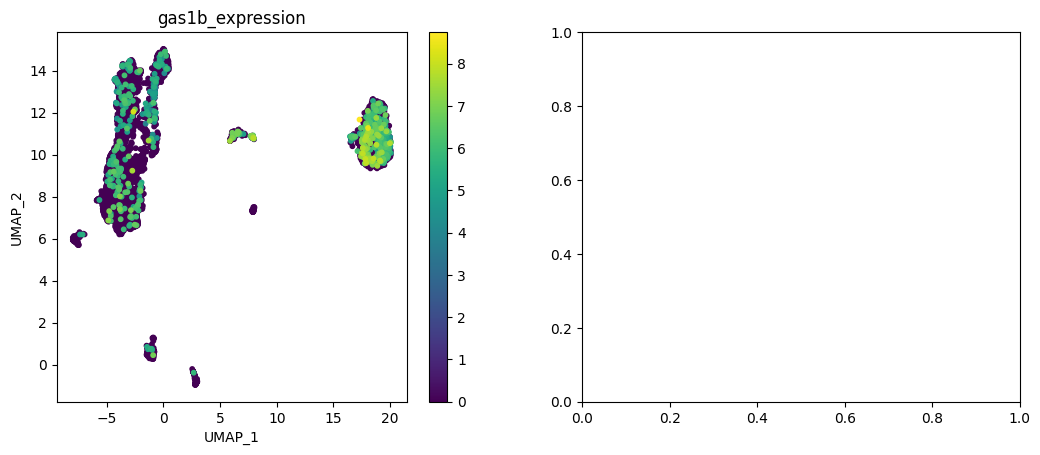

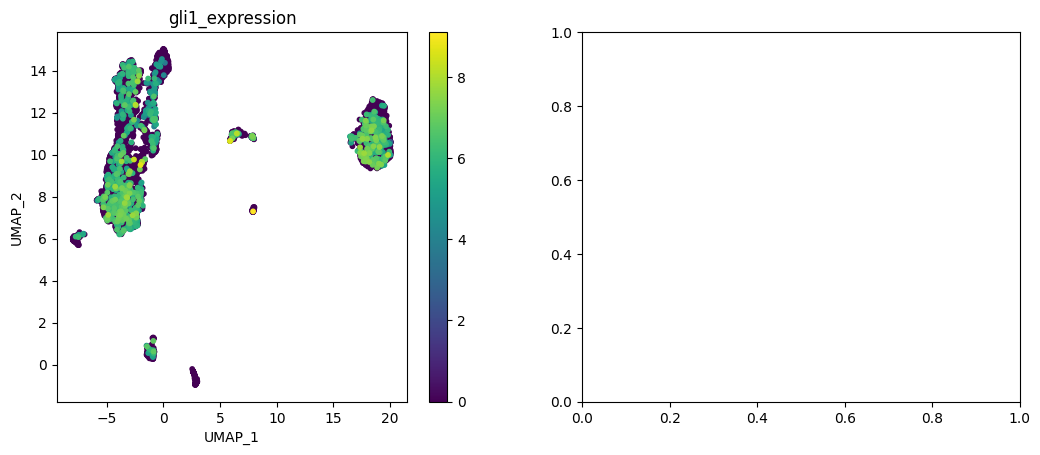

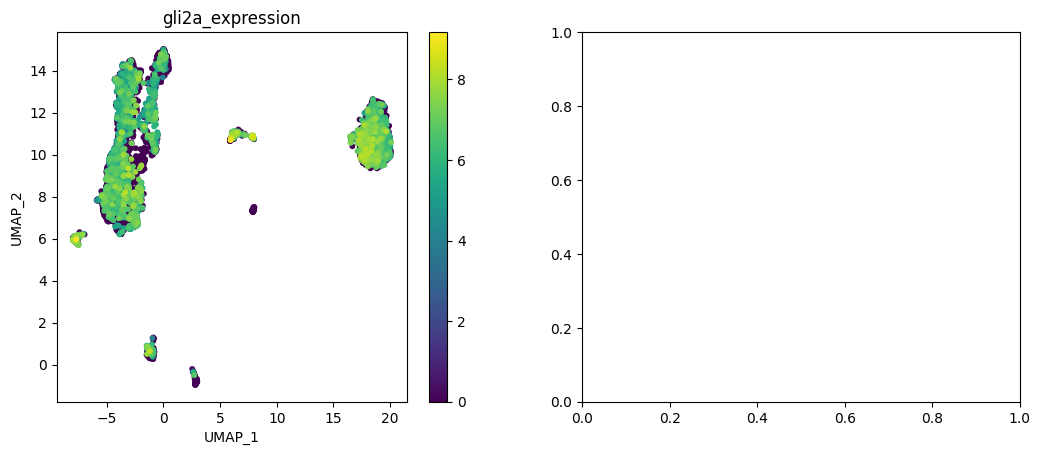

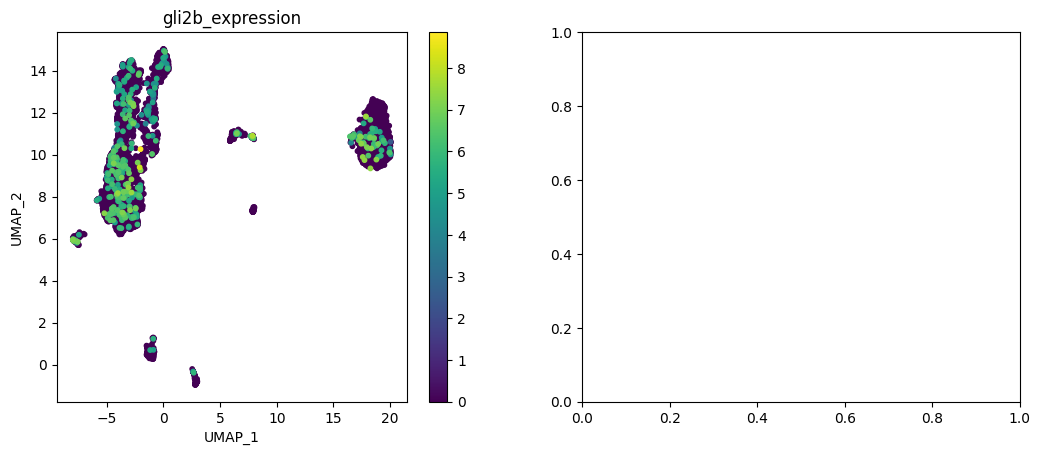

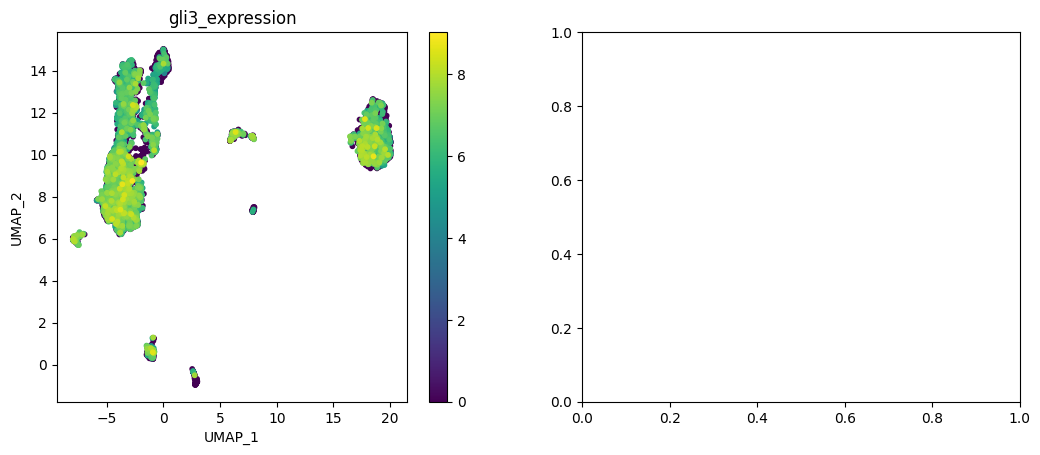

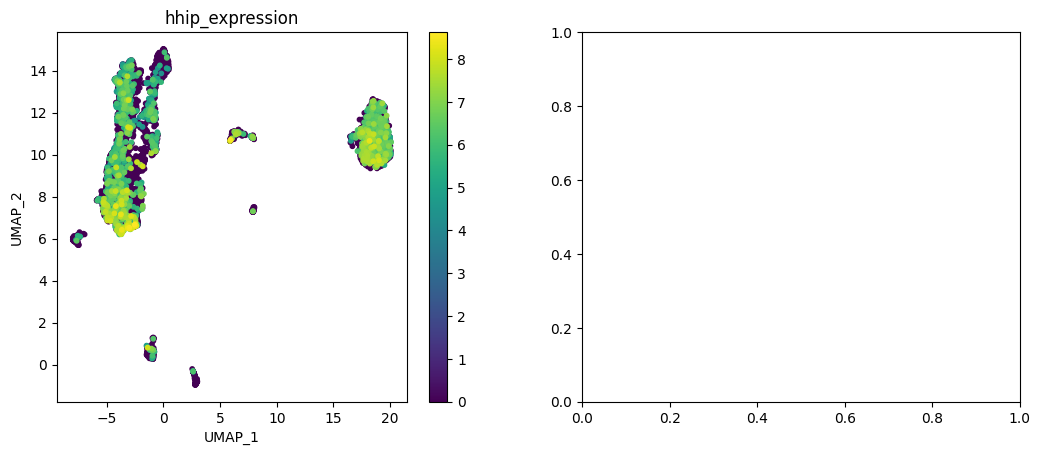

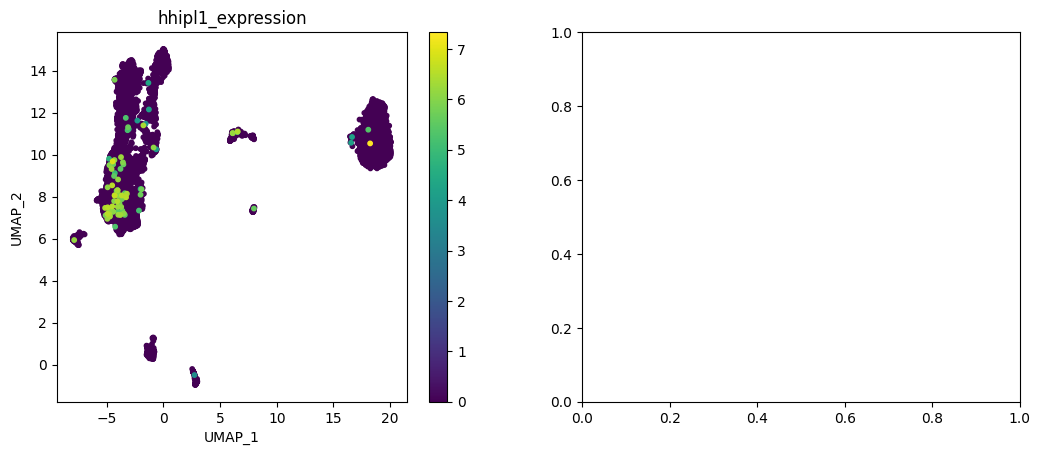

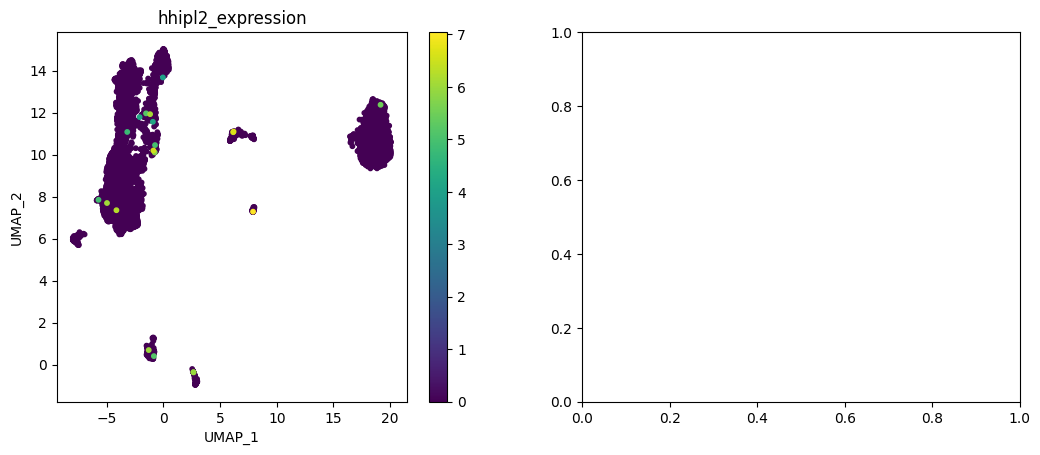

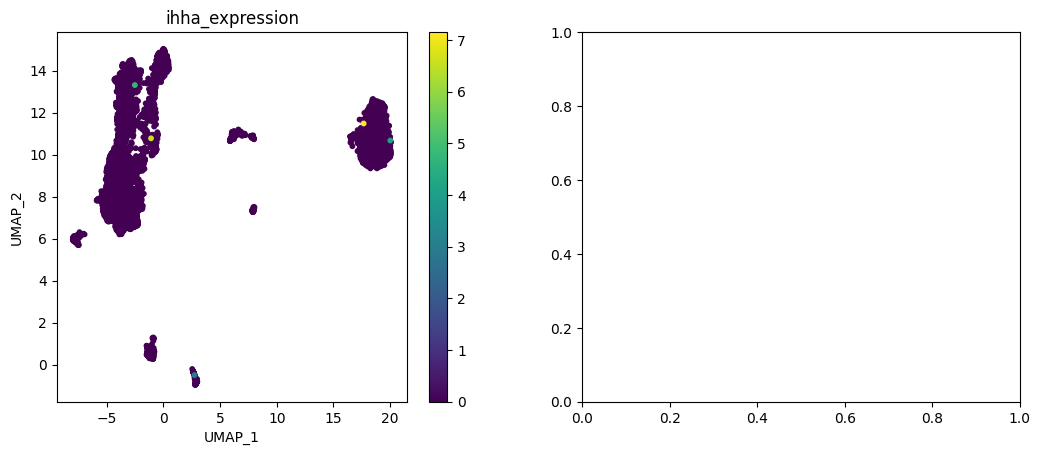

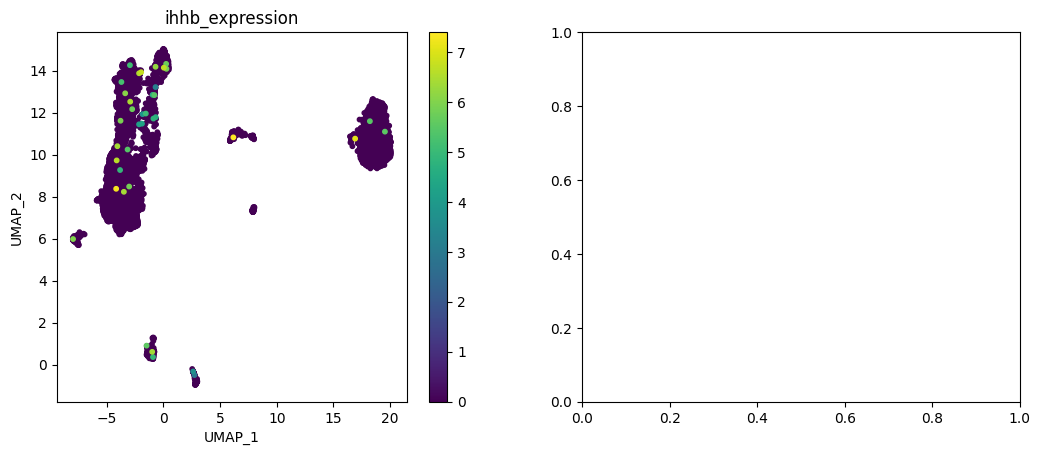

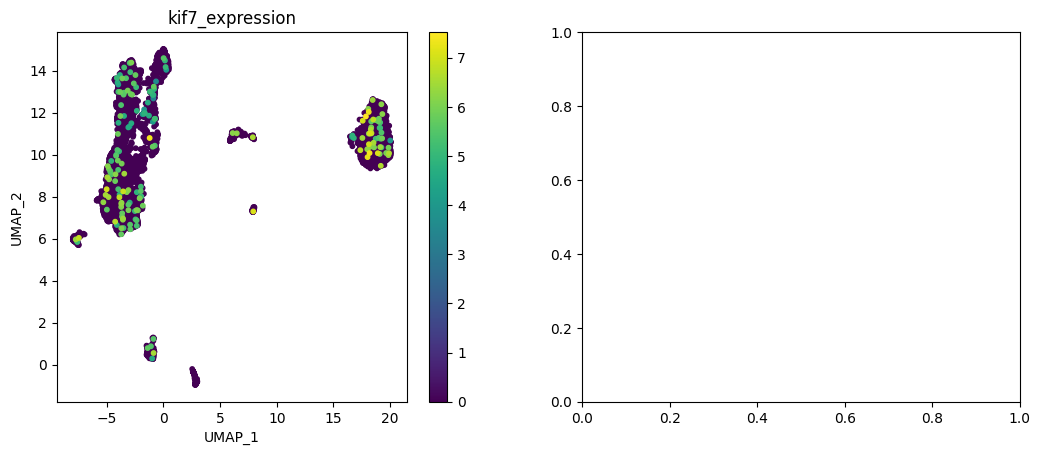

<Figure size 1920x480 with 0 Axes>

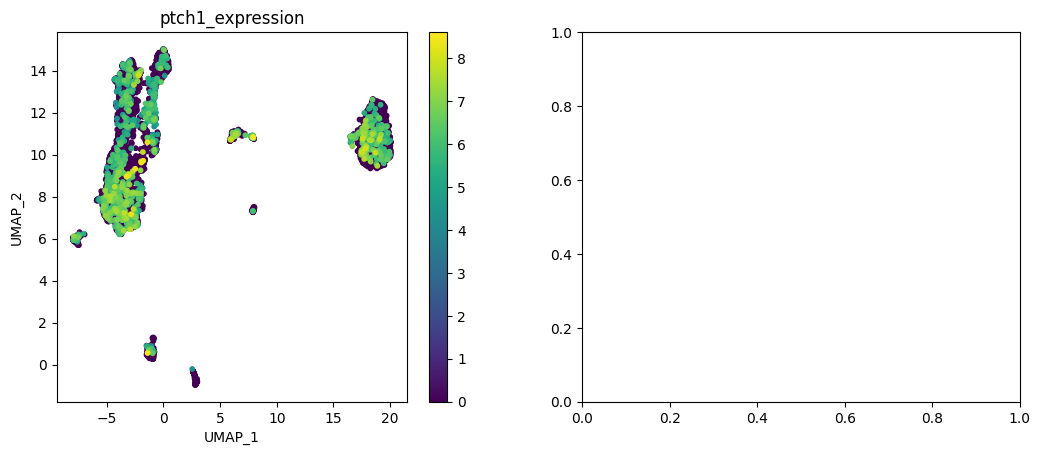

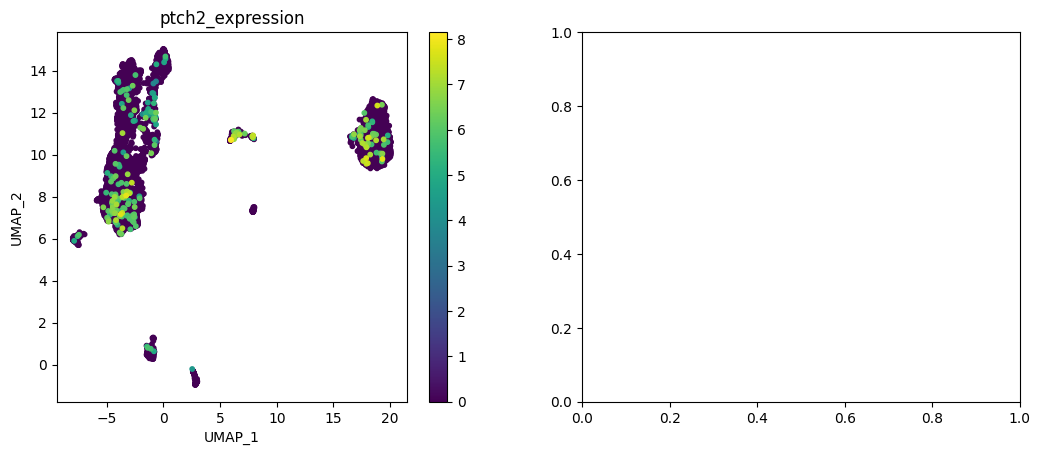

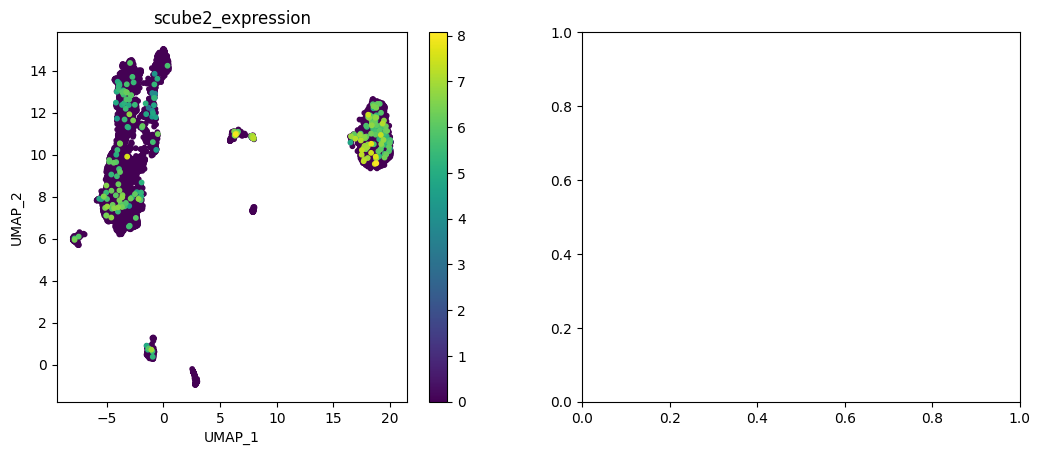

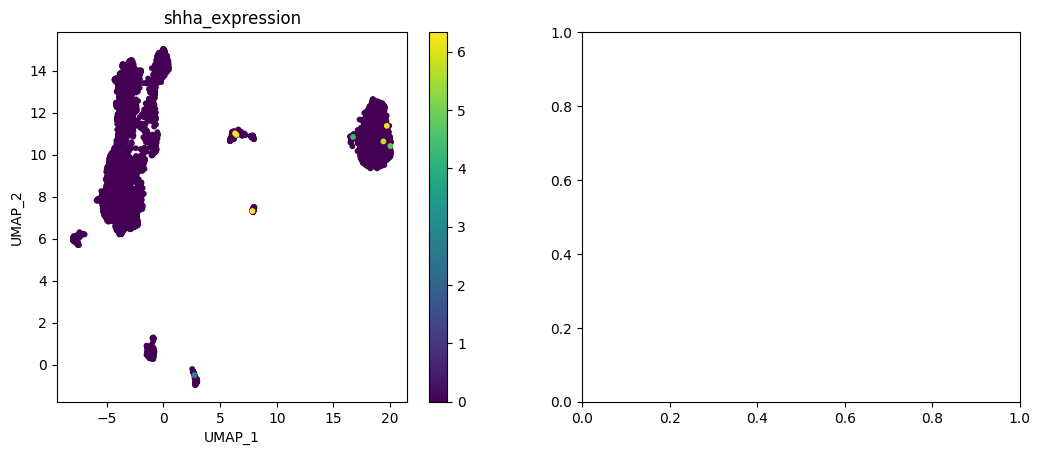

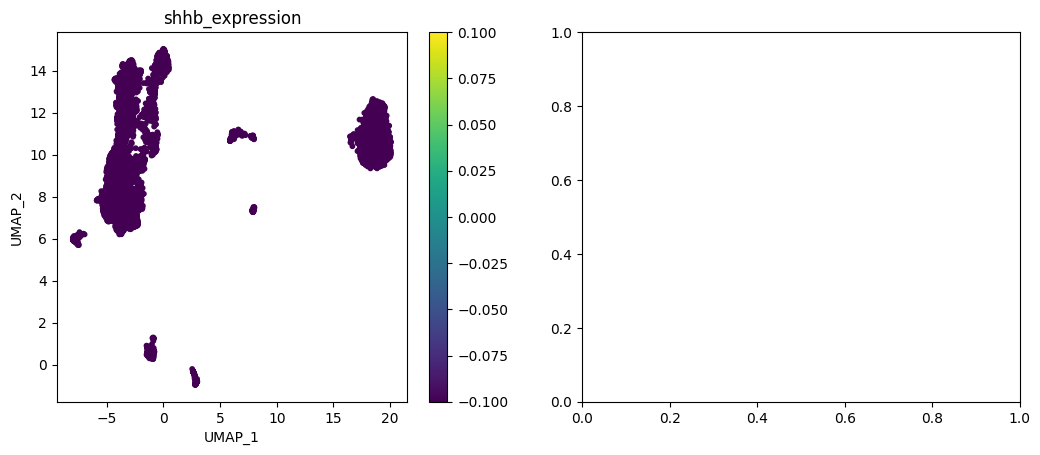

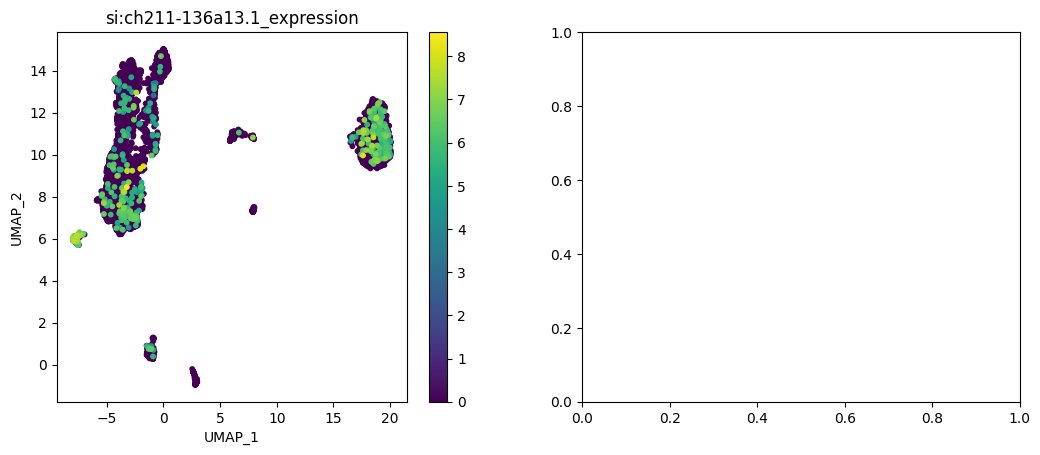

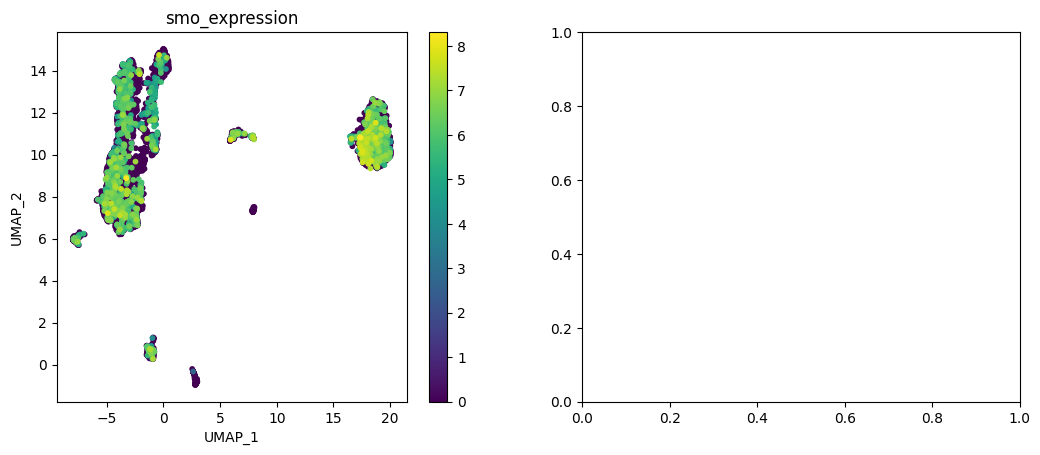

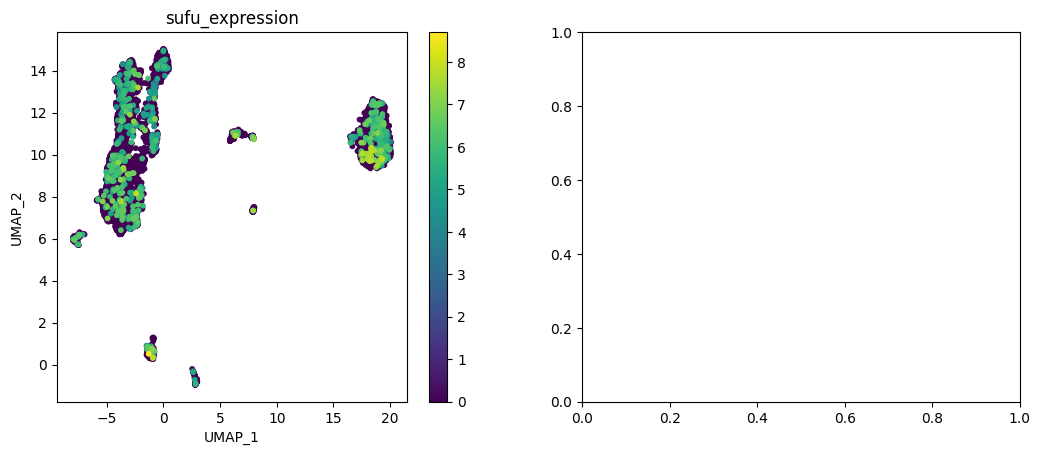

In [20]:
searchfor=['pax3a_+','myod1_+','myog_+','sox10_+','met_+','cdh15_+','pax7a_+','wnt2_+','notch3_+','gfap_+','boc_+','cdon_+','dhh_+',
           'gas1a_+','gas1b_+','gli1_+','gli2a_+','gli2b_+','gli3_+','hhip_+','hhipl1_+','hhipl2_+','ihha_+','ihhb_+','kif7_+',
           'mir214a_+','ptch1_+','ptch2_+','scube2_+','shha_+','shhb_+','si:ch211-136a13.1_+','smo_+','sufu_+']

from scenicplus.plotting.coverageplot import coverage_plot



for x in searchfor:
    try:
        plot_eRegulon(
            scplus_obj = scplus_obj,
            reduction_name = 'eRegulons_UMAP',
            selected_regulons = [x],
            scale = True,
            auc_key = 'eRegulon_AUC_filtered',
            save= outDir + 'visualization/GeneExpression/plot_eRegulonUMAP_genes_interest_' + x + "_pdf"
            )
    except:
        pass
    

In [21]:
#scplus_obj.uns['TF2G_adj']
scplus_obj.uns['TF2G_adj'].to_csv(r'SCENIC_results_MARCH2024//TF2G_adj.csv')



In [22]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [23]:
UMAP_coord=scplus_obj.dr_cell['eRegulons_UMAP']
UMAP_coord.to_csv(r'SCENIC_results_MARCH2024/eRegulon_UMAP_coord.csv')


In [24]:
metadata_cell=scplus_obj.metadata_cell

In [25]:
metadata_cell

GEX_orig.ident  GEX_nCount_RNA  \
TCCGGAATCACACAGT-1-6dpf___6dpf           6dpf          2628.0   
GCTGATCCACGAACAG-1-6dpf___6dpf           6dpf          1546.0   
AGCTAACTCCTCATGC-1-6dpf___6dpf           6dpf          3087.0   
GGCTGGTTCATTACTC-1-4dpf___4dpf           4dpf          5836.0   
CGATCCTTCTCACATT-1-2dpf___2dpf           2dpf           469.0   
...                                       ...             ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf           4dpf           453.0   
TGCTAACAGCGGGCAA-1-2dpf___2dpf           2dpf           821.0   
GCCTAATAGTAACCAC-1-6dpf___6dpf           6dpf          4113.0   
CGGTGAACACTTCATC-1-2dpf___2dpf           2dpf          1067.0   
ACCTACCTCCTTGAGG-1-2dpf___2dpf           2dpf           654.0   

                                GEX_nFeature_RNA  GEX_percent.mt  \
TCCGGAATCACACAGT-1-6dpf___6dpf             936.0        8.485540   
GCTGATCCACGAACAG-1-6dpf___6dpf             729.0        1.681759   
AGCTAACTCCTCATGC-1-6dpf___6dpf            1351.0        0.907029   
GGCTGGTTCATTACTC-1-4dpf___4dpf            2256.0        1.353667   
CGATCCTTCTCACATT-1-2dpf___2dpf             374.0        1.279318   
...                                          ...             ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf             292.0        9.050773   
TGCTAACAGCGGGCAA-1-2dpf___2dpf             573.0        1.339829   
GCCTAATAGTAACCAC-1-6dpf___6dpf            1219.0        1.483102   
CGGTGAACACTTCATC-1-2dpf___2dpf             622.0        1.593252   
ACCTACCTCCTTGAGG-1-2dpf___2dpf             471.0        1.223242   

                                GEX_nCount_ATAC  GEX_nFeature_ATAC  \
TCCGGAATCACACAGT-1-6dpf___6dpf           8304.0             3815.0   
GCTGATCCACGAACAG-1-6dpf___6dpf           5327.0             2519.0   
AGCTAACTCCTCATGC-1-6dpf___6dpf           9884.0             4551.0   
GGCTGGTTCATTACTC-1-4dpf___4dpf          18799.0             7381.0   
CGATCCTTCTCACATT-1-2dpf___2dpf           4025.0             2090.0   
...                                         ...                ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf          20726.0             8666.0   
TGCTAACAGCGGGCAA-1-2dpf___2dpf           6505.0             3283.0   
GCCTAATAGTAACCAC-1-6dpf___6dpf           5522.0             2616.0   
CGGTGAACACTTCATC-1-2dpf___2dpf           1610.0              839.0   
ACCTACCTCCTTGAGG-1-2dpf___2dpf           6691.0             3394.0   

                               GEX_condition  GEX_nCount_SCT  \
TCCGGAATCACACAGT-1-6dpf___6dpf          6dpf          2242.0   
GCTGATCCACGAACAG-1-6dpf___6dpf          6dpf          1781.0   
AGCTAACTCCTCATGC-1-6dpf___6dpf          6dpf          2407.0   
GGCTGGTTCATTACTC-1-4dpf___4dpf          4dpf          2453.0   
CGATCCTTCTCACATT-1-2dpf___2dpf          2dpf          1404.0   
...                                      ...             ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf          4dpf          1411.0   
TGCTAACAGCGGGCAA-1-2dpf___2dpf          2dpf          1734.0   
GCCTAATAGTAACCAC-1-6dpf___6dpf          6dpf          2466.0   
CGGTGAACACTTCATC-1-2dpf___2dpf          2dpf          1689.0   
ACCTACCTCCTTGAGG-1-2dpf___2dpf          2dpf          1575.0   

                                GEX_nFeature_SCT  GEX_SCT.weight  ...  \
TCCGGAATCACACAGT-1-6dpf___6dpf             936.0        0.519719  ...   
GCTGATCCACGAACAG-1-6dpf___6dpf             729.0        0.666255  ...   
AGCTAACTCCTCATGC-1-6dpf___6dpf            1348.0        0.399466  ...   
GGCTGGTTCATTACTC-1-4dpf___4dpf            1498.0        0.495727  ...   
CGATCCTTCTCACATT-1-2dpf___2dpf             435.0        0.625885  ...   
...                                          ...             ...  ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf             387.0        0.149514  ...   
TGCTAACAGCGGGCAA-1-2dpf___2dpf             583.0        0.596875  ...   
GCCTAATAGTAACCAC-1-6dpf___6dpf            1140.0        0.590437  ...   
CGGTGAACACTTCATC-1-2dpf___2dpf             624.0        0.513977  ...   
ACCTACCTCCTTGAGG-1-2

In [26]:
metadata_genes=scplus_obj.metadata_genes

In [27]:
metadata_genes

features
fgfr1op2                      fgfr1op2
si:dkey-21h14.12      si:dkey-21h14.12
si:dkey-285e18.2      si:dkey-285e18.2
znf1114                        znf1114
si:dkey-21h14.10      si:dkey-21h14.10
...                                ...
CABZ01088864.1          CABZ01088864.1
CABZ01110379.1          CABZ01110379.1
CABZ01109604.1          CABZ01109604.1
ENSDARG00000101098  ENSDARG00000101098
ENSDARG00000103574  ENSDARG00000103574

[25432 rows x 1 columns]

In [28]:
scplus_obj


SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [29]:
#from scenicplus.plotting.dotplot import heatmap_dotplot
#heatmap_dotplot(
#        scplus_obj = scplus_obj,
#        size_matrix = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'],
#        color_matrix = scplus_obj.to_df('EXP'),
#        group_variable = 'GEX_celltype',
#        scale_size_matrix = True,
#        scale_color_matrix = True,
#        figsize = (5, 20),
#        orientation = 'vertical')

In [30]:
scplus_obj


SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [31]:
scplus_obj.uns['eRegulon_AUC_filtered']['Region_based']

sox3_+_(51r)  meis1b_+_(280r)  \
Cell                                                            
TCCGGAATCACACAGT-1-6dpf___6dpf      0.011545         0.347791   
GCTGATCCACGAACAG-1-6dpf___6dpf      0.000000         0.221478   
AGCTAACTCCTCATGC-1-6dpf___6dpf      0.022932         0.393408   
GGCTGGTTCATTACTC-1-4dpf___4dpf      0.034940         0.385909   
CGATCCTTCTCACATT-1-2dpf___2dpf      0.391624         0.288969   
...                                      ...              ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf      0.000372         0.201170   
TGCTAACAGCGGGCAA-1-2dpf___2dpf      0.257831         0.293281   
GCCTAATAGTAACCAC-1-6dpf___6dpf      0.028695         0.345065   
CGGTGAACACTTCATC-1-2dpf___2dpf      0.241670         0.293409   
ACCTACCTCCTTGAGG-1-2dpf___2dpf      0.333061         0.299736   

                                twist1a_+_(130r)  tfap2c_+_(168r)  \
Cell                                                                
TCCGGAATCACACAGT-1-6dpf___6dpf          0.167967         0.235078   
GCTGATCCACGAACAG-1-6dpf___6dpf          0.331825         0.272946   
AGCTAACTCCTCATGC-1-6dpf___6dpf          0.164779         0.236218   
GGCTGGTTCATTACTC-1-4dpf___4dpf          0.140376         0.255976   
CGATCCTTCTCACATT-1-2dpf___2dpf          0.265869         0.227781   
...                                          ...              ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf          0.265711         0.263151   
TGCTAACAGCGGGCAA-1-2dpf___2dpf          0.233382         0.249412   
GCCTAATAGTAACCAC-1-6dpf___6dpf          0.205040         0.273724   
CGGTGAACACTTCATC-1-2dpf___2dpf          0.280410         0.248443   
ACCTACCTCCTTGAGG-1-2dpf___2dpf          0.203716         0.237317   

                                klf2b_extended_+_(97r)  pax3a_+_(73r)  \
Cell                                                                    
TCCGGAATCACACAGT-1-6dpf___6dpf                0.263410       0.491351   
GCTGATCCACGAACAG-1-6dpf___6dpf                0.280712       0.492389   
AGCTAACTCCTCATGC-1-6dpf___6dpf                0.256732       0.465925   
GGCTGGTTCATTACTC-1-4dpf___4dpf                0.269383       0.481371   
CGATCCTTCTCACATT-1-2dpf___2dpf                0.232162       0.542621   
...                                                ...            ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf                0.237200       0.409796   
TGCTAACAGCGGGCAA-1-2dpf___2dpf                0.258167       0.535345   
GCCTAATAGTAACCAC-1-6dpf___6dpf                0.268092       0.480449   
CGGTGAACACTTCATC-1-2dpf___2dpf                0.240251       0.507778   
ACCTACCTCCTTGAGG-1-2dpf___2dpf                0.241858       0.536409   

                                mef2aa_+_(227r)  tead3b_+_(293r)  \
Cell                                                               
TCCGGAATCACACAGT-1-6dpf___6dpf         0.436357         0.439708   
GCTGATCCACGAACAG-1-6dpf___6dpf         0.065944         0.326932   
AGCTAACTCCTCATGC-1-6dpf___6dpf         0.239789         0.539898   
GGCTGGTTCATTACTC-1-4dpf___4dpf         0.186998         0.516431   
CGATCCTTCTCACATT-1-2dpf___2dpf         0.075361         0.316065   
...                                         ...              ...   
GGTGATTTCCCGAACA-1-4dpf___4dpf         0.055282         0.288964   
TGCTAACAGCGGGCAA-1-2dpf___2dpf         0.089396         0.350590   
GCCTAATAGTAACCAC-1-6dpf___6dpf         0.146430         0.470725   
CGGTGAACACTTCATC-1-2dpf___2dpf         0.102951         0.354017   
ACCTACCTCCTTGAGG-1-2dpf___2dpf         0.089463         0.341592   

                                her9_extended_+_(167r)  nfatc1_+_(39r)  ...  \
Cell                                                                    ...   
TCCGGAATCACACAGT-1-6dpf___6dpf                0.435851        0.137004  ...   
GCTGATCCACGAACAG-1-6dpf___6dpf                0.422228        0.361752  ...   
AGCTAACTCCTCATGC-1-6dpf___6dpf                0.432026        0.284566  ...   
GGCTGGTTCATTACTC-1-4dpf___4dpf                0.445125    

In [32]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [33]:

from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks




In [34]:

generate_pseudobulks(
                    scplus_obj = scplus_obj,
                    variable = '',
                    auc_key = 'eRegulon_AUC_filtered',
                    signature_key = 'Gene_based',
                    nr_cells = 10,
                    nr_pseudobulks = 100,
                    seed=555
                    )


In [35]:

generate_pseudobulks(
                    scplus_obj = scplus_obj,
                    variable = 'GEX_celltype',
                    auc_key = 'eRegulon_AUC_filtered',
                    signature_key = 'Region_based',
                    nr_cells = 10,
                    nr_pseudobulks = 100,
                    seed=555
                    )


In [36]:
# Correlation between TF and eRegulons
import time
start_time = time.time()
TF_cistrome_correlation(scplus_obj,
                        variable = 'GEX_celltype', 
                        auc_key = 'eRegulon_AUC_filtered',
                        signature_key = 'Gene_based',
                        out_key = 'GEX_celltype_eGRN_gene_based')
TF_cistrome_correlation(scplus_obj,
                        variable = 'GEX_celltype', 
                        auc_key = 'eRegulon_AUC_filtered',
                        signature_key = 'Region_based',
                        out_key = 'GEX_celltype_eGRN_region_based')
time = time.time()-start_time
print(time/60)

0.0033239523569742837


In [37]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [38]:
from scenicplus.dimensionality_reduction import *

run_eRegulons_umap(scplus_obj,
                   scale=True, signature_keys=['Gene_based', 'Region_based'],reduction_name='eRegulons_UMAP_gr' )

run_eRegulons_umap(scplus_obj,
                   scale=True, signature_keys=['Gene_based'],reduction_name='eRegulons_UMAP_gb')

run_eRegulons_umap(scplus_obj,
                   scale=True, signature_keys=['Region_based'],reduction_name='eRegulons_UMAP_rb')


In [39]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

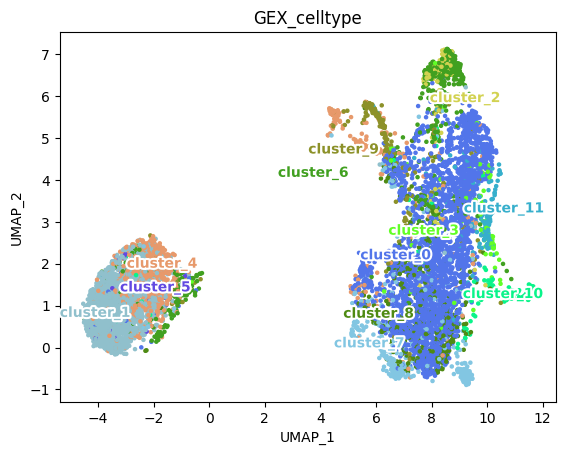

In [40]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gb',
                 variables=['GEX_celltype'], 
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

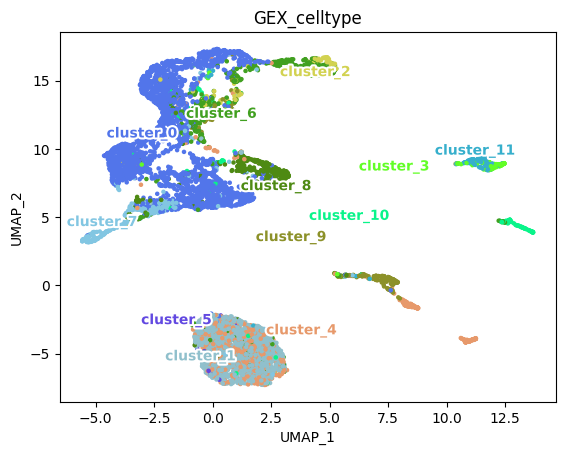

In [41]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_rb',
                 variables=['GEX_celltype'], 
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

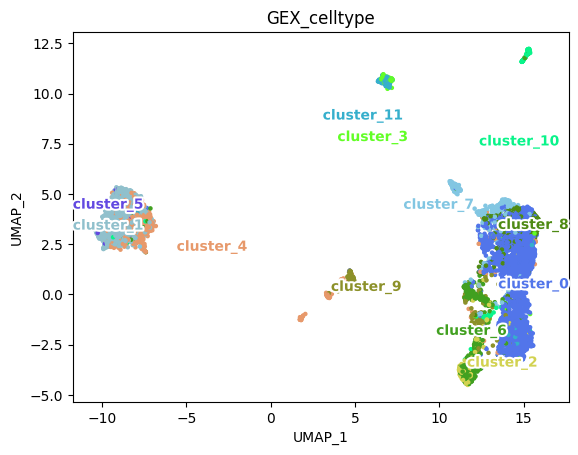

In [42]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gr',
                 variables=['GEX_celltype'], 
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

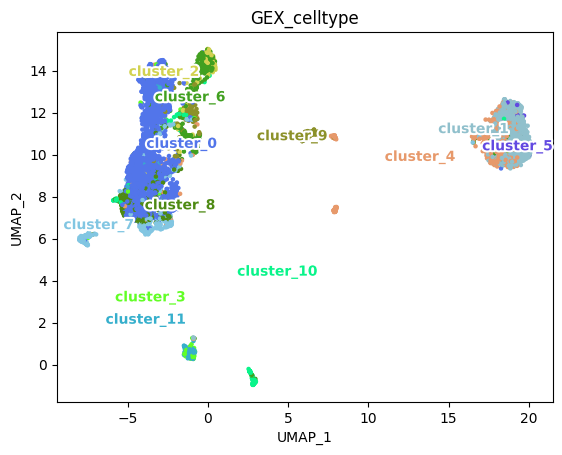

In [43]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP',
                 variables=['GEX_celltype'], 
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

In [44]:
find_clusters(scplus_obj,
              signature_keys=['Gene_based', 'Region_based'],
              k = 10,
              res = [0.2,0.4,0.6,0.8, 1.0, 1.2,1.4, 1.5], 
              prefix = 'SCENIC+_', 
              scale = True)

In [45]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

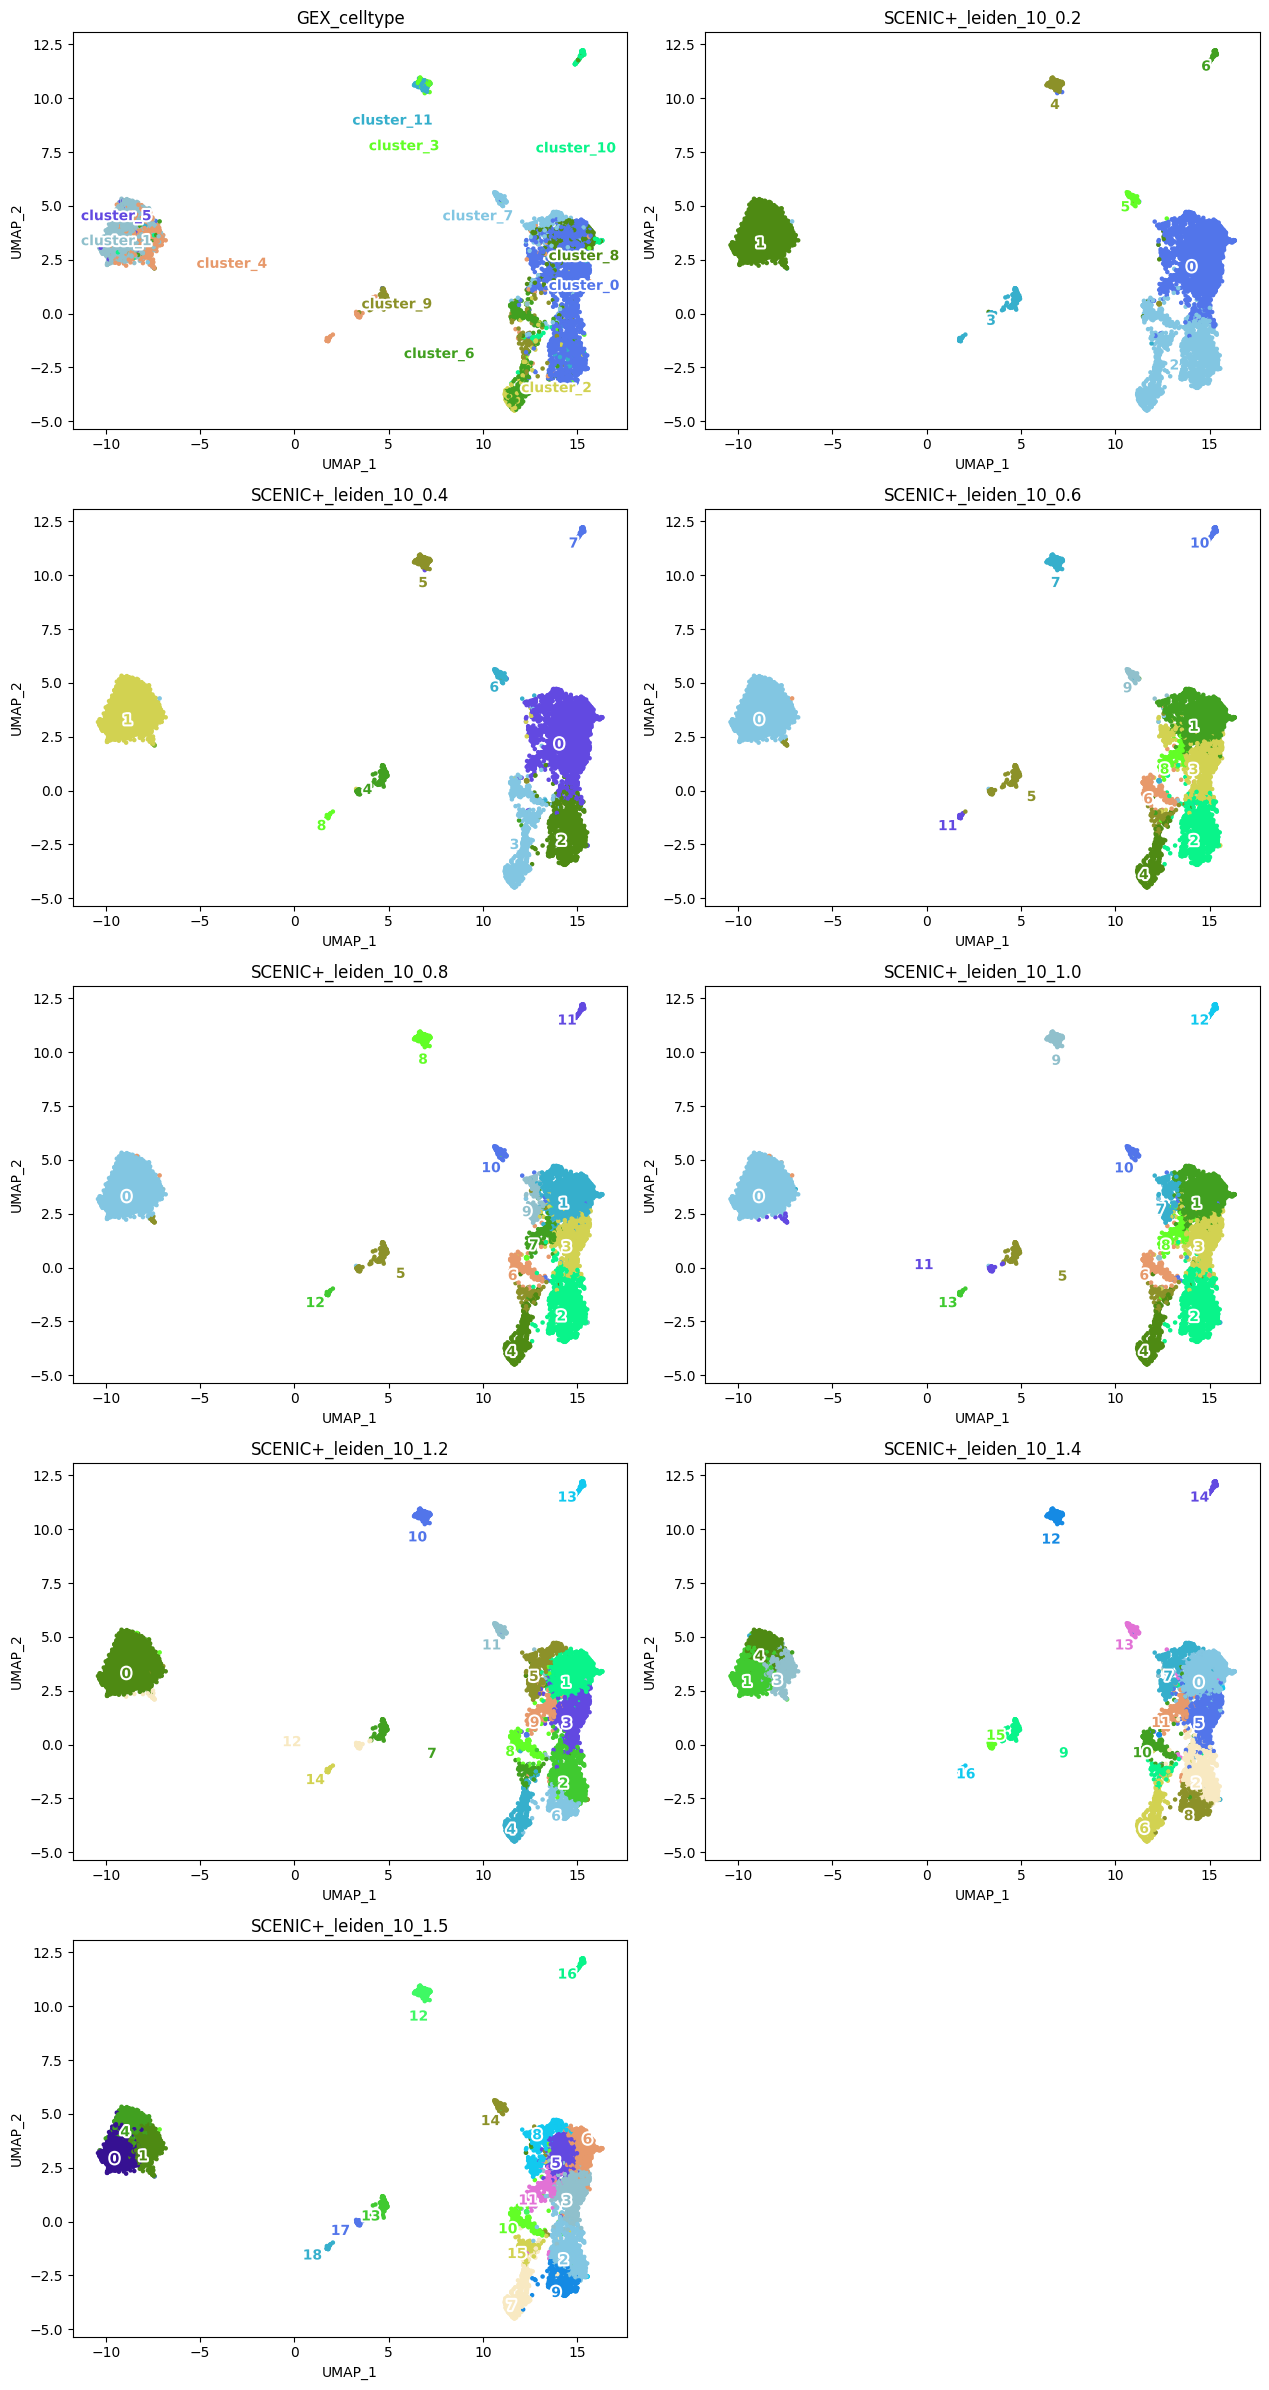

In [46]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gr',
                 variables=[ 'GEX_celltype', 'SCENIC+_leiden_10_0.2', 'SCENIC+_leiden_10_0.4', 'SCENIC+_leiden_10_0.6', 'SCENIC+_leiden_10_0.8', 'SCENIC+_leiden_10_1.0', 'SCENIC+_leiden_10_1.2', 'SCENIC+_leiden_10_1.4', 'SCENIC+_leiden_10_1.5'], 
                 num_columns=2,
                 text_size=10,
                 dot_size=5,
                 save= outDir + 'visualization/UMAP_comparison.pdf')

In [47]:
cells2dpf=scplus_obj.cell_names[scplus_obj.metadata_cell['GEX_orig.ident']=='2dpf']
cells4dpf=scplus_obj.cell_names[scplus_obj.metadata_cell['GEX_orig.ident']=='4dpf']
cells6dpf=scplus_obj.cell_names[scplus_obj.metadata_cell['GEX_orig.ident']=='6dpf']

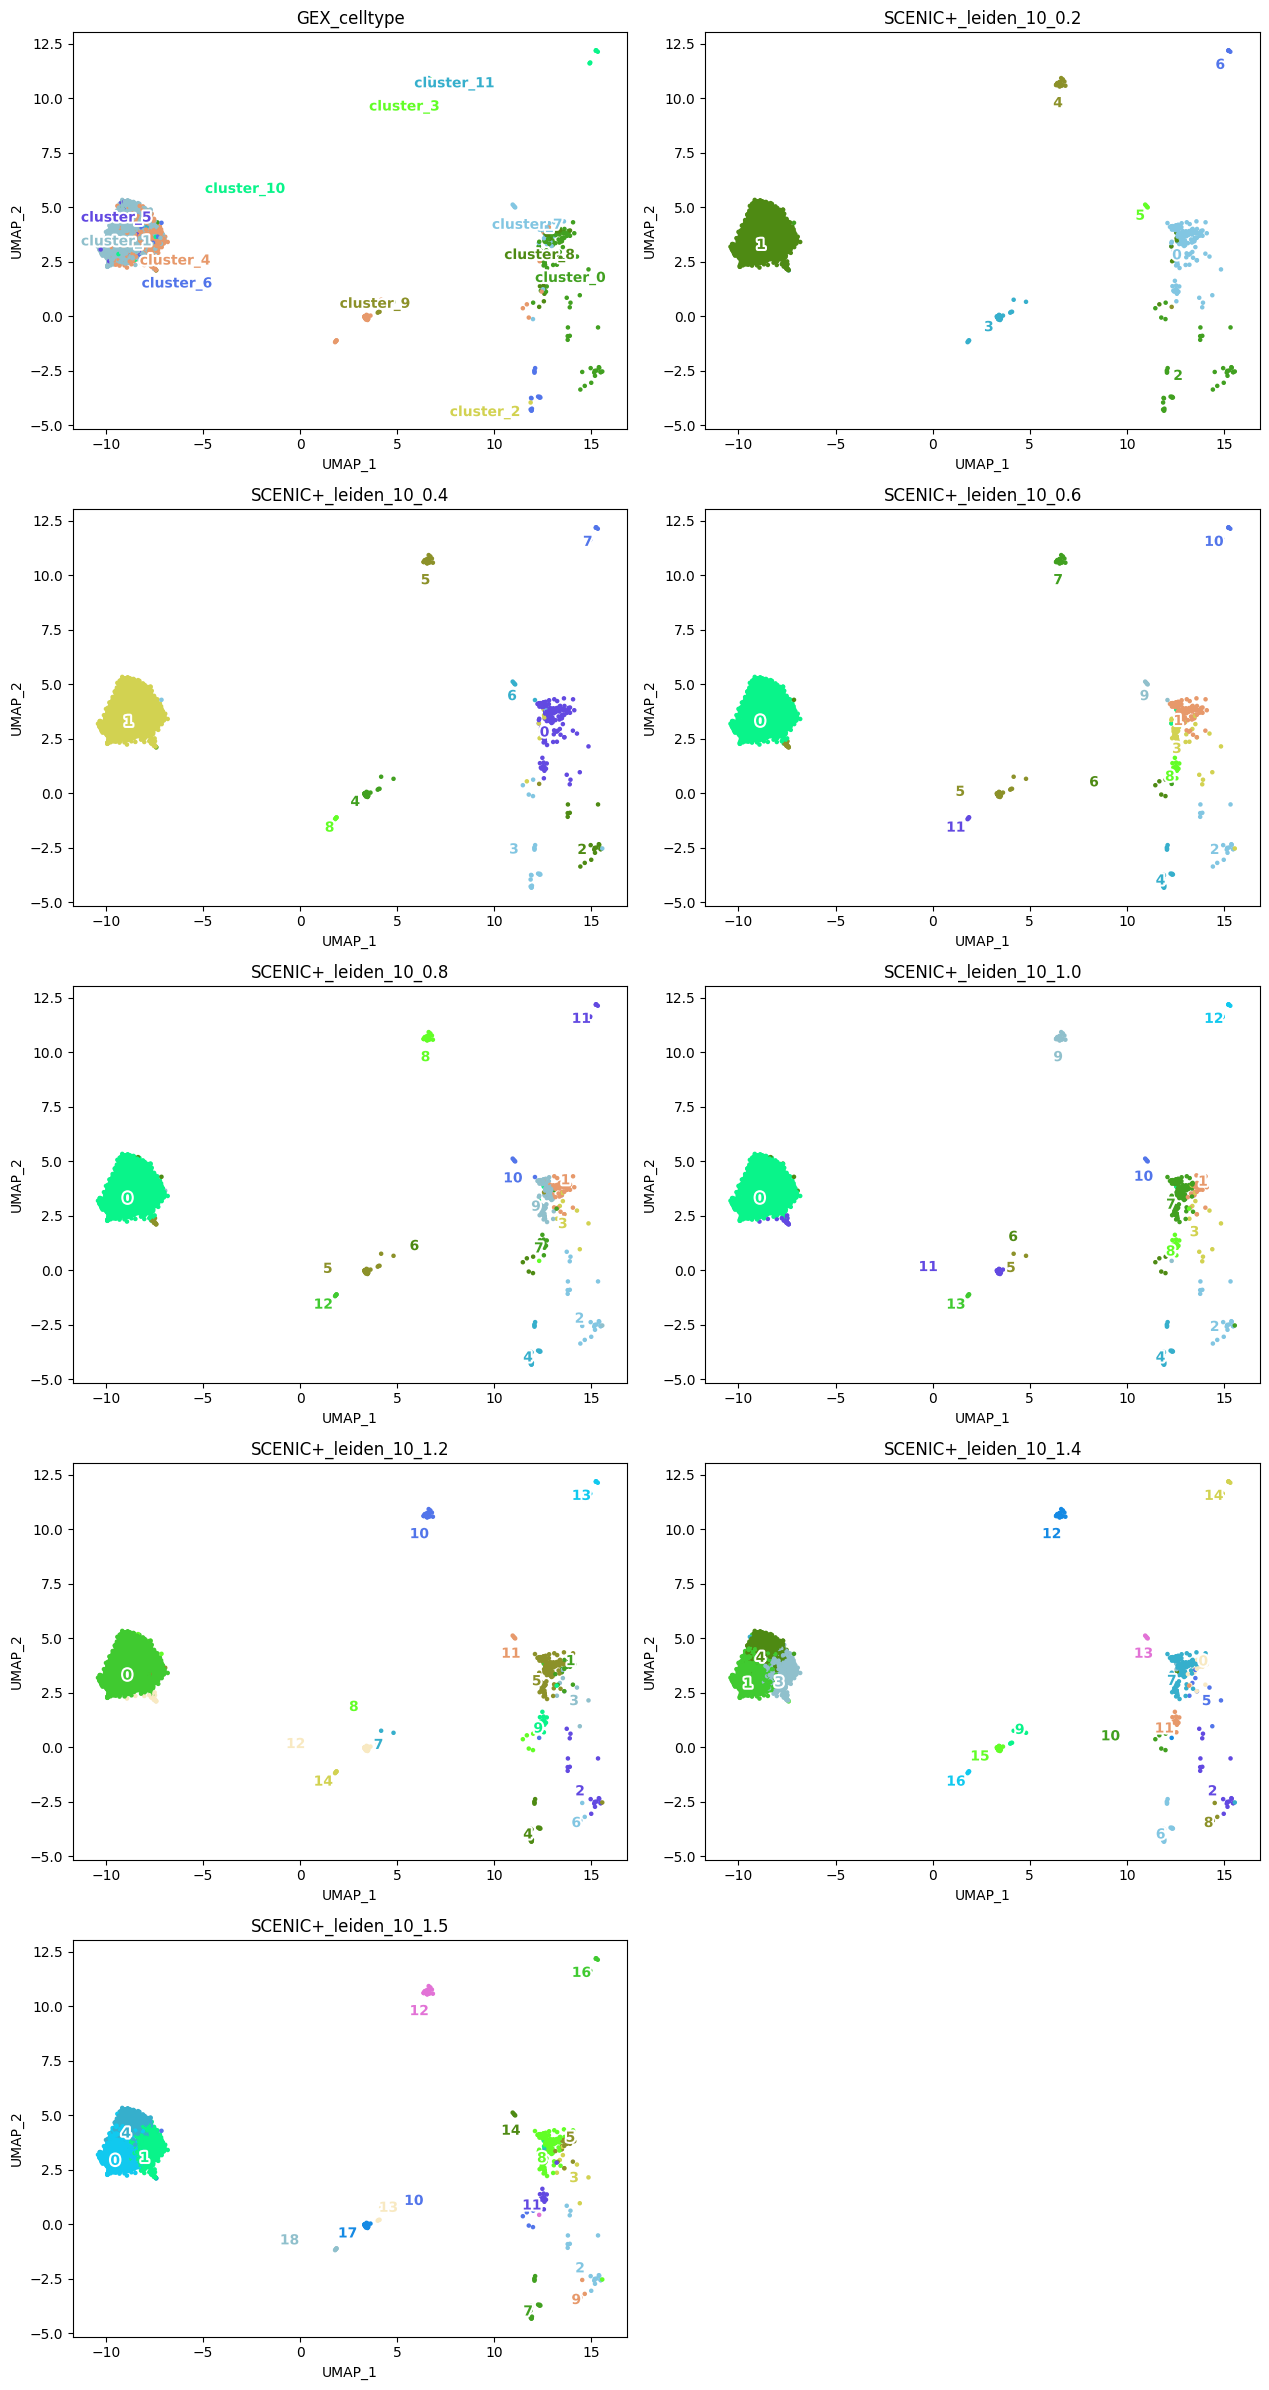

In [48]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gr',
                 variables=[ 'GEX_celltype', 'SCENIC+_leiden_10_0.2', 'SCENIC+_leiden_10_0.4', 'SCENIC+_leiden_10_0.6', 'SCENIC+_leiden_10_0.8', 'SCENIC+_leiden_10_1.0', 'SCENIC+_leiden_10_1.2', 'SCENIC+_leiden_10_1.4', 'SCENIC+_leiden_10_1.5'], 
                 num_columns=2,
                 text_size=10,
                 dot_size=5,
                 selected_cells=cells2dpf,
                 save= outDir + 'visualization/cells2dpf_UMAP_comparison.pdf')

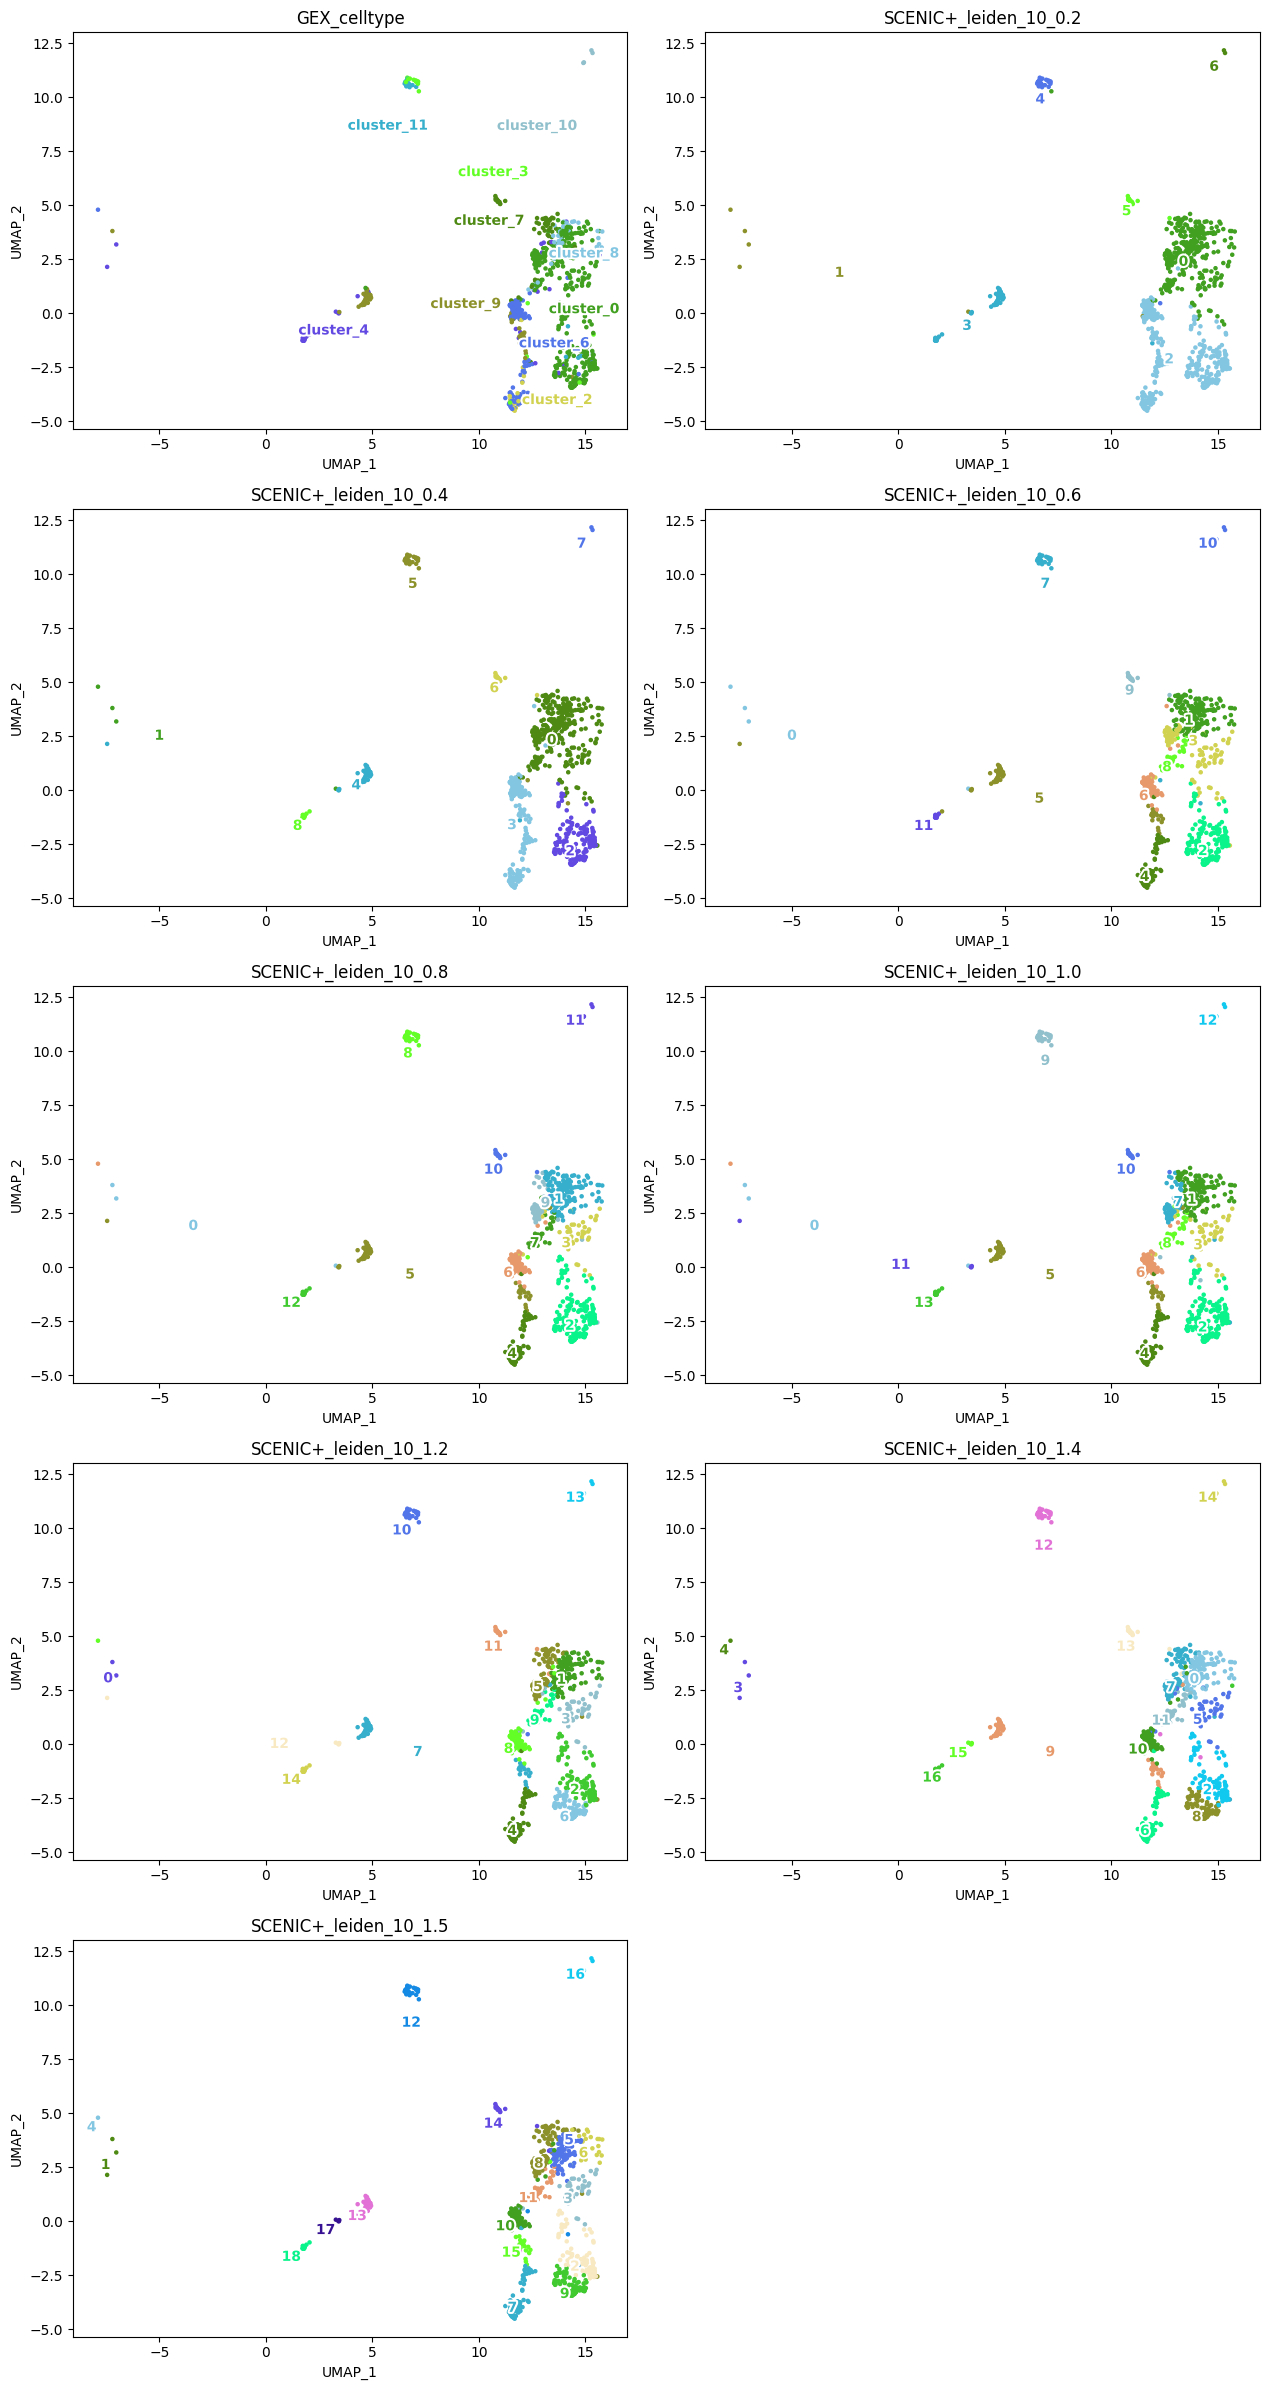

In [49]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gr',
                 variables=[ 'GEX_celltype', 'SCENIC+_leiden_10_0.2', 'SCENIC+_leiden_10_0.4', 'SCENIC+_leiden_10_0.6', 'SCENIC+_leiden_10_0.8', 'SCENIC+_leiden_10_1.0', 'SCENIC+_leiden_10_1.2', 'SCENIC+_leiden_10_1.4', 'SCENIC+_leiden_10_1.5'], 
                 num_columns=2,
                 text_size=10,
                 dot_size=5,
                 selected_cells=cells4dpf,
                 save= outDir + 'visualization/cells4dpf_UMAP_comparison.pdf')

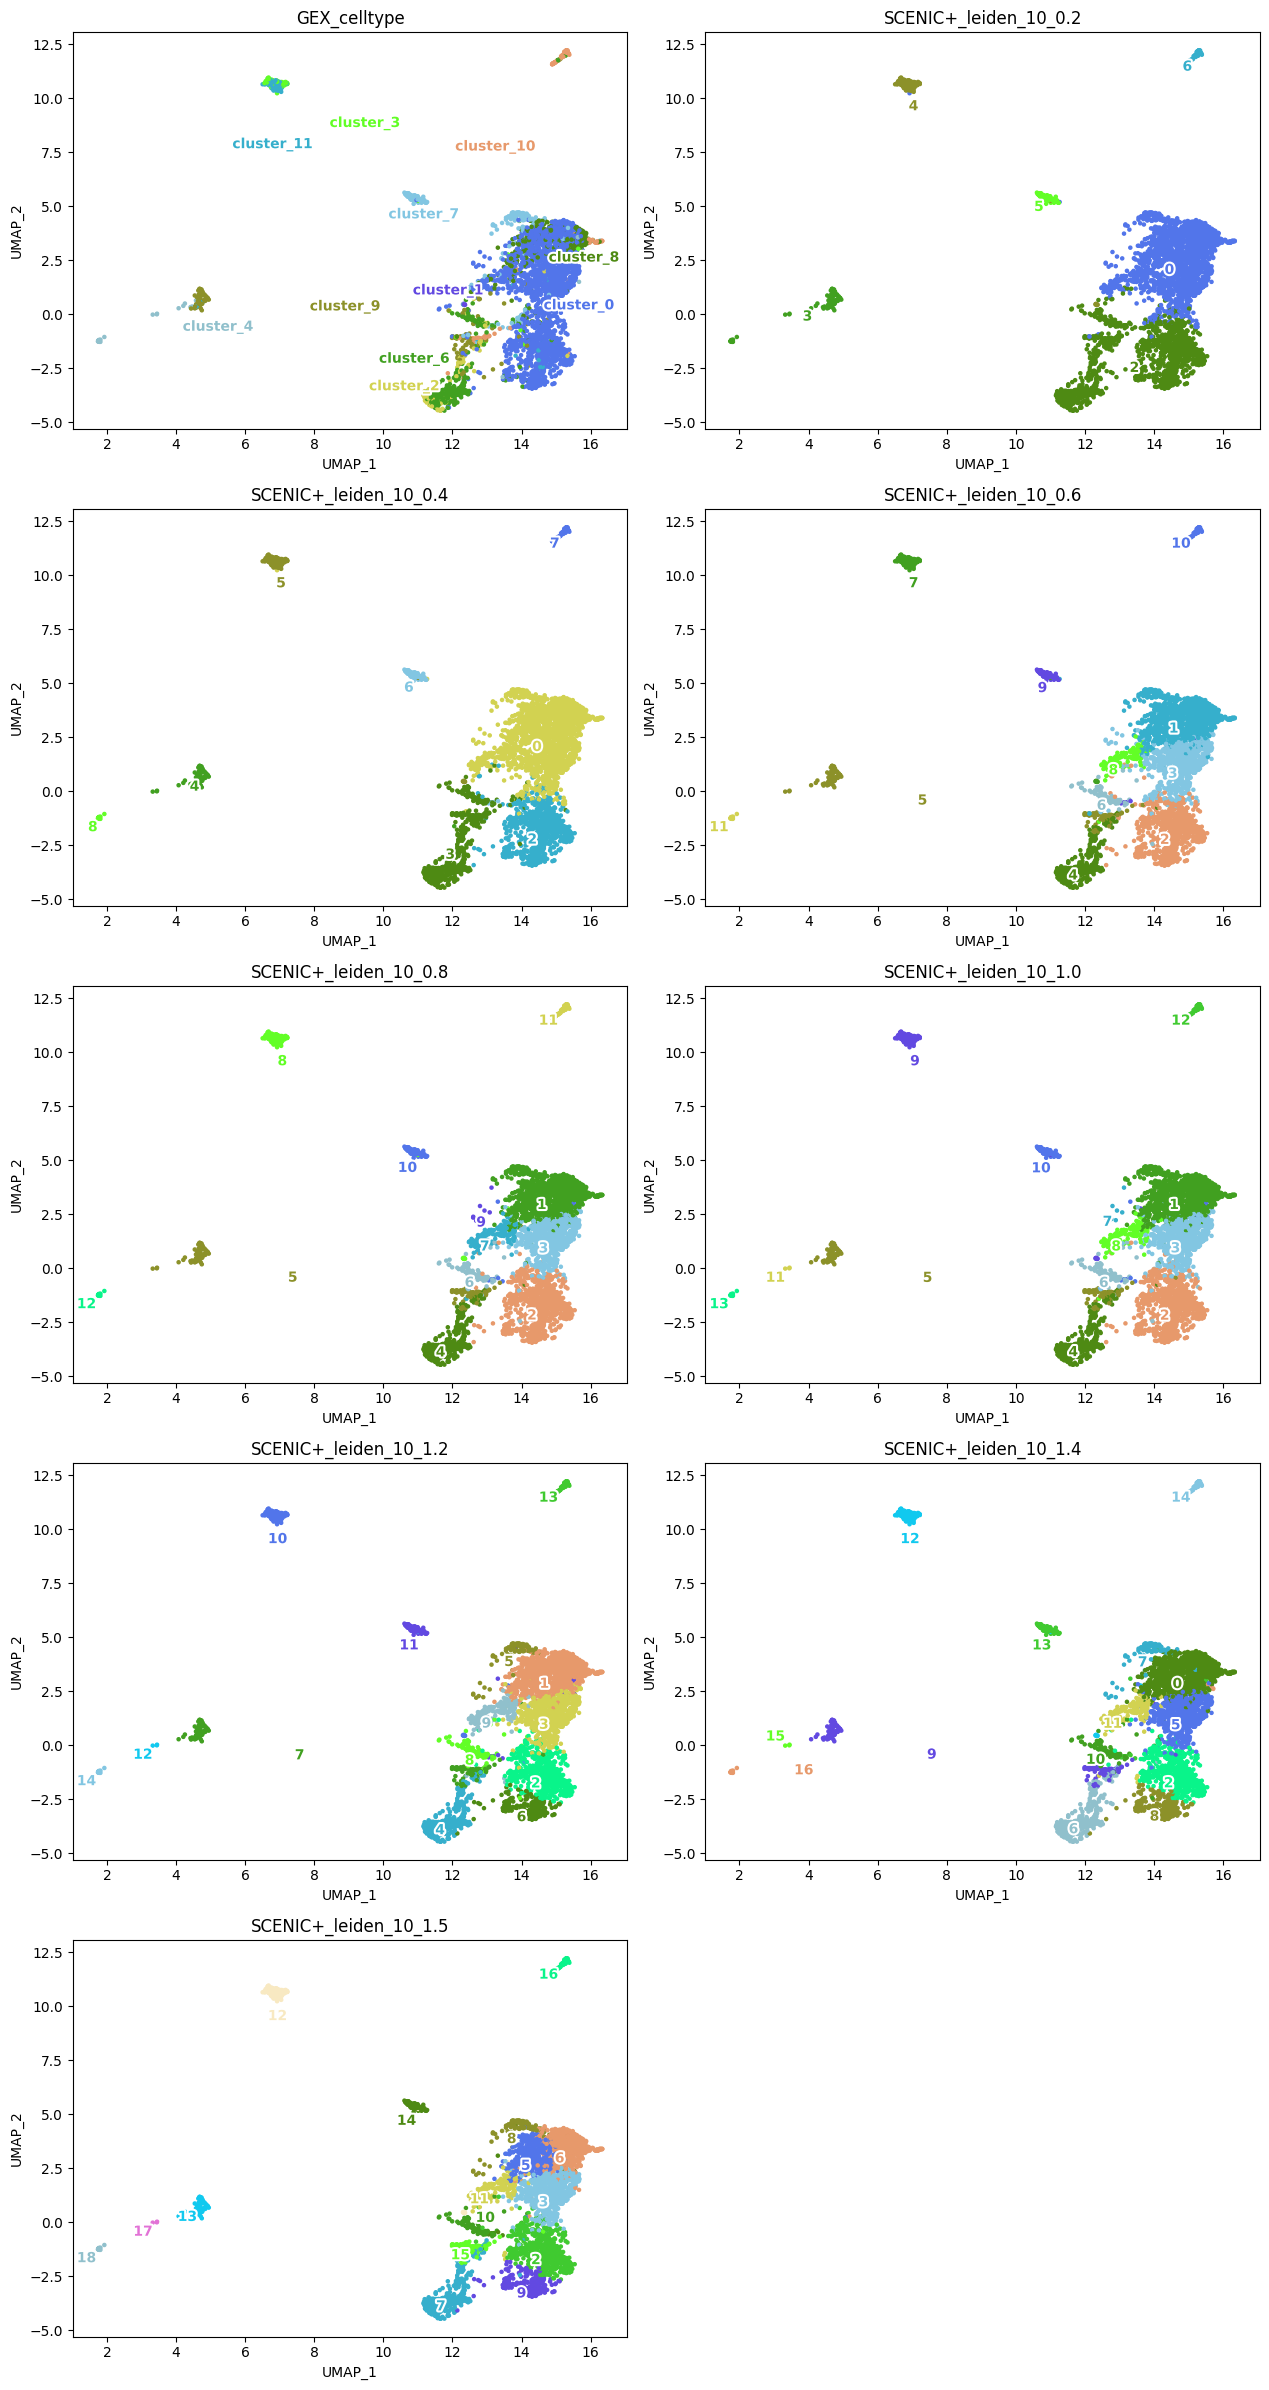

In [50]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gr',
                 variables=[ 'GEX_celltype', 'SCENIC+_leiden_10_0.2', 'SCENIC+_leiden_10_0.4', 'SCENIC+_leiden_10_0.6', 'SCENIC+_leiden_10_0.8', 'SCENIC+_leiden_10_1.0', 'SCENIC+_leiden_10_1.2', 'SCENIC+_leiden_10_1.4', 'SCENIC+_leiden_10_1.5'], 
                 num_columns=2,
                 text_size=10,
                 dot_size=5,
                 selected_cells=cells6dpf,
                 save= outDir + 'visualization/cells6dpf_UMAP_comparison.pdf')

In [51]:
# combine variables SCENIC+_leiden_10_0.6 and sample
scplus_obj.metadata_cell["sample_Res.0.6"] = scplus_obj.metadata_cell['SCENIC+_leiden_10_0.6'] + "_" + scplus_obj.metadata_cell['GEX_orig.ident']
scplus_obj.metadata_cell["sample_Res.0.8"] = scplus_obj.metadata_cell['SCENIC+_leiden_10_0.8'] + "_" + scplus_obj.metadata_cell['GEX_orig.ident']
scplus_obj.metadata_cell["sample_Res.1.0"] = scplus_obj.metadata_cell['SCENIC+_leiden_10_1.0'] + "_" + scplus_obj.metadata_cell['GEX_orig.ident']
scplus_obj.metadata_cell["sample_Res.1.2"] = scplus_obj.metadata_cell['SCENIC+_leiden_10_1.2'] + "_" + scplus_obj.metadata_cell['GEX_orig.ident']









In [52]:

generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'SCENIC+_leiden_10_0.6',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based',
        nr_cells = 10,
        nr_pseudobulks = 100,
        seed=555
        )




generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'SCENIC+_leiden_10_0.8',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based',
        nr_cells = 10,
        nr_pseudobulks = 100,
        seed=555
        )



generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'SCENIC+_leiden_10_1.0',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based',
        nr_cells = 10,
        nr_pseudobulks = 100,
        seed=555
        )



generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'SCENIC+_leiden_10_1.2',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based',
        nr_cells = 10,
        nr_pseudobulks = 100,
        seed=555
        )





In [53]:
scplus_obj



SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [54]:
scplus_obj.metadata_cell["sample_Res.1.2"]

TCCGGAATCACACAGT-1-6dpf___6dpf    8_6dpf
GCTGATCCACGAACAG-1-6dpf___6dpf    1_6dpf
AGCTAACTCCTCATGC-1-6dpf___6dpf    2_6dpf
GGCTGGTTCATTACTC-1-4dpf___4dpf    2_4dpf
CGATCCTTCTCACATT-1-2dpf___2dpf    0_2dpf
                                   ...  
GGTGATTTCCCGAACA-1-4dpf___4dpf    9_4dpf
TGCTAACAGCGGGCAA-1-2dpf___2dpf    0_2dpf
GCCTAATAGTAACCAC-1-6dpf___6dpf    3_6dpf
CGGTGAACACTTCATC-1-2dpf___2dpf    0_2dpf
ACCTACCTCCTTGAGG-1-2dpf___2dpf    0_2dpf
Name: sample_Res.1.2, Length: 7774, dtype: object

In [55]:
from scenicplus.RSS import *
regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_0.6',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)

regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_0.8',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)


regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_1.0',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)


regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_1.2',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)




In [56]:
from scenicplus.RSS import *
regulon_specificity_scores(scplus_obj, 
                         'sample_Res.0.6',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)

regulon_specificity_scores(scplus_obj, 
                         'sample_Res.0.8',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)


regulon_specificity_scores(scplus_obj, 
                         'sample_Res.1.0',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)


regulon_specificity_scores(scplus_obj, 
                         'sample_Res.1.2',
                         signature_keys=['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)

In [57]:
regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_0.6',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)

regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_0.8',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)

regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_1.0',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)


regulon_specificity_scores(scplus_obj, 
                         'SCENIC+_leiden_10_1.2',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)

In [58]:
regulon_specificity_scores(scplus_obj, 
                         'sample_Res.0.6',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)

regulon_specificity_scores(scplus_obj, 
                         'sample_Res.0.8',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)

regulon_specificity_scores(scplus_obj, 
                         'sample_Res.1.0',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)


regulon_specificity_scores(scplus_obj, 
                         'sample_Res.1.2',
                         signature_keys=['Region_based'],
                         out_key_suffix='_region_based',
                         scale=False)

In [59]:
#plot_rss(scplus_obj,'SCENIC+_leiden_10_1.2_gene_based',num_columns=4, top_n=10)


In [60]:
scplus_obj.uns['RSS'].keys()

dict_keys(['GEX_celltype_gene_based', 'GEX_celltype_region_based', 'SCENIC+_leiden_10_0.6_gene_based', 'SCENIC+_leiden_10_0.8_gene_based', 'SCENIC+_leiden_10_1.0_gene_based', 'SCENIC+_leiden_10_1.2_gene_based', 'sample_Res.0.6_gene_based', 'sample_Res.0.8_gene_based', 'sample_Res.1.0_gene_based', 'sample_Res.1.2_gene_based', 'SCENIC+_leiden_10_0.6_region_based', 'SCENIC+_leiden_10_0.8_region_based', 'SCENIC+_leiden_10_1.0_region_based', 'SCENIC+_leiden_10_1.2_region_based', 'sample_Res.0.6_region_based', 'sample_Res.0.8_region_based', 'sample_Res.1.0_region_based', 'sample_Res.1.2_region_based'])

In [61]:
scplus_obj.uns['RSS']['SCENIC+_leiden_10_0.6_region_based']

cux1a_+_+_(95r)  sox9b_+_+_(17r)  myod1_+_-_(25r)  \
6          0.211379         0.203727         0.208862   
1          0.337439         0.288819         0.420226   
2          0.303506         0.286055         0.262582   
0          0.447962         0.522359         0.409086   
8          0.203229         0.192063         0.217613   
7          0.202833         0.218270         0.189743   
3          0.291955         0.247922         0.303364   
4          0.228976         0.211003         0.214163   
5          0.225360         0.253024         0.210137   
9          0.194170         0.187858         0.193459   
10         0.182382         0.186876         0.178244   
11         0.178771         0.178228         0.175730   

    gli3_extended_+_-_(11r)  ybx1_+_-_(73r)  hoxc13a_+_+_(17r)  \
6                  0.190455        0.211581           0.205987   
1                  0.296538        0.345134           0.316965   
2                  0.233698        0.303714           0.261120   
0                  0.585053        0.427581           0.482392   
8                  0.189582        0.204162           0.199712   
7                  0.211165        0.207675           0.205022   
3                  0.192484        0.288724           0.268808   
4                  0.181692        0.236196           0.213911   
5                  0.272887        0.227770           0.234739   
9                  0.187267        0.197742           0.246383   
10                 0.167721        0.188983           0.182038   
11                 0.182419        0.184068           0.180404   

    myog_+_+_(178r)  mef2cb_+_+_(214r)  dbpb_+_+_(19r)  \
6          0.215378           0.220037        0.211160   
1          0.272826           0.258624        0.339710   
2          0.430750           0.380862        0.298603   
0          0.357880           0.350016        0.421646   
8          0.191940           0.189216        0.203314   
7          0.190534           0.185062        0.208478   
3          0.280696           0.270906        0.289336   
4          0.309425           0.388910        0.238247   
5          0.200266           0.198478        0.231951   
9          0.178325           0.183665        0.196443   
10         0.176407           0.176652        0.212464   
11         0.171641           0.171271        0.180847   

    zeb1b_extended_+_+_(128r)  ...  pou2f2a_extended_+_+_(28r)  \
6                    0.214747  ...                    0.179269   
1                    0.297839  ...                    0.179083   
2                    0.408345  ...                    0.172507   
0                    0.389029  ...                    0.568404   
8                    0.196552  ...                    0.174001   
7                    0.191106  ...                    0.196460   
3                    0.290528  ...                    0.203897   
4                    0.258933  ...                    0.175953   
5                    0.205399  ...                    0.303514   
9                    0.179698  ...                    0.168076   
10                   0.180848  ...                    0.167445   
11                   0.172785  ...                    0.319741   

    junba_+_-_(59r)  pax3a_+_-_(11r)  cux1a_extended_+_+_(95r)  \
6          0.210597         0.209089                  0.211379   
1          0.344404         0.380392                  0.337439   
2          0.297612         0.270041                  0.303506   
0          0.444279         0.434135                  0.447962   
8          0.203522         0.209697                  0.203229   
7          0.207838         0.209113                  0.202833   
3          0.284724         0.289248                  0.291955   
4          0.228023         0.215065                  0.228976   
5          0.226727         0.215031                  0.225360   
9          0.195444         0.211959                  0.194170   
10         0.190648         0.180543                  0.182382 

In [62]:
scplus_obj.uns['RSS']['SCENIC+_leiden_10_0.8_region_based']

cux1a_+_+_(95r)  sox9b_+_+_(17r)  myod1_+_-_(25r)  \
6          0.211964         0.204246         0.209375   
1          0.327146         0.280925         0.409683   
2          0.308510         0.289903         0.267003   
0          0.447645         0.522110         0.408717   
7          0.207764         0.195175         0.222526   
8          0.202843         0.218267         0.189797   
3          0.273928         0.234944         0.286190   
4          0.228976         0.211003         0.214163   
5          0.225789         0.253333         0.210575   
10         0.195454         0.188743         0.194733   
9          0.203100         0.191620         0.207368   
11         0.182382         0.186876         0.178244   
12         0.178951         0.178576         0.175855   

    gli3_extended_+_-_(11r)  ybx1_+_-_(73r)  hoxc13a_+_+_(17r)  \
6                  0.190801        0.212166           0.206703   
1                  0.287854        0.334723           0.302057   
2                  0.234808        0.308647           0.264763   
0                  0.584773        0.427266           0.481949   
7                  0.191265        0.208830           0.203235   
8                  0.211194        0.207674           0.205025   
3                  0.186091        0.271314           0.252139   
4                  0.181692        0.236196           0.213911   
5                  0.273249        0.228159           0.234940   
10                 0.187433        0.199038           0.248466   
9                  0.188951        0.202335           0.210972   
11                 0.167721        0.188983           0.182038   
12                 0.182858        0.184272           0.180644   

    myog_+_+_(178r)  mef2cb_+_+_(214r)  dbpb_+_+_(19r)  \
6          0.216051           0.220767        0.211744   
1          0.266505           0.252436        0.329998   
2          0.438309           0.387777        0.303364   
0          0.357652           0.349795        0.421348   
7          0.194937           0.192381        0.207974   
8          0.190397           0.184972        0.208476   
3          0.260986           0.252651        0.272055   
4          0.309425           0.388910        0.238247   
5          0.200634           0.198770        0.232431   
10         0.179185           0.184513        0.197687   
9          0.192879           0.190896        0.201226   
11         0.176407           0.176652        0.212464   
12         0.171713           0.171326        0.181027   

    zeb1b_extended_+_+_(128r)  ...  pou2f2a_extended_+_+_(28r)  \
6                    0.215408  ...                    0.179351   
1                    0.290626  ...                    0.177659   
2                    0.415502  ...                    0.173063   
0                    0.388763  ...                    0.568593   
7                    0.200000  ...                    0.175230   
8                    0.190990  ...                    0.196542   
3                    0.270511  ...                    0.199170   
4                    0.258933  ...                    0.175953   
5                    0.205809  ...                    0.302785   
10                   0.180659  ...                    0.168141   
9                    0.196428  ...                    0.175972   
11                   0.180848  ...                    0.167445   
12                   0.172880  ...                    0.321249   

    junba_+_-_(59r)  pax3a_+_-_(11r)  cux1a_extended_+_+_(95r)  \
6          0.211169         0.209709                  0.211964   
1          0.334130         0.369568                  0.327146   
2          0.302374         0.274406                  0.308510   
0          0.443964         0.433782                  0.447645   
7          0.208128         0.214318                  0.207764   
8          0.207847         0.209170                  0.202843   
3          0.268047         0.273497                  0.273928   
4          0.2

In [63]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [64]:
#scplus_obj.metadata_genes[scplus_obj.metadata_genes['features'].str.contains(r"met", na=False) ]

In [65]:
#scplus_obj

In [66]:
with open(outDir + 'scplus_obj_7kcells_more_resolutions.pkl', 'wb') as f:
  dill.dump(scplus_obj, f)

In [67]:
#os.makedirs(outDir+'forSeurat')
scplus_obj.dr_cell['eRegulons_UMAP'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/eRegulons_UMAP.csv')
scplus_obj.dr_cell['eRegulons_UMAP_gb'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/eRegulons_UMAP_gb.csv')
scplus_obj.dr_cell['eRegulons_UMAP_gr'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/eRegulons_UMAP_gr.csv')
scplus_obj.dr_cell['eRegulons_UMAP_rb'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/eRegulons_UMAP_rb.csv')

                                                                                           

In [68]:
scplus_obj.gene_names


Index(['fgfr1op2', 'si:dkey-21h14.12', 'si:dkey-285e18.2', 'znf1114',
       'si:dkey-21h14.10', 'ENSDARG00000076014', 'si:dkey-199m13.5', 'erc1b',
       'si:dkey-199m13.4', 'si:dkey-285e18.5',
       ...
       'CABZ01072614.1', 'ttc8', 'CABZ01074745.1', 'CABZ01118270.1',
       'ENSDARG00000116774', 'CABZ01088864.1', 'CABZ01110379.1',
       'CABZ01109604.1', 'ENSDARG00000101098', 'ENSDARG00000103574'],
      dtype='object', length=25432)

In [69]:

with open("SCENIC_results_MARCH2024/forSeurat/genes_names_list.scplus_order.txt", "wb") as fp:   #Pickling
   pickle.dump(scplus_obj.gene_names, fp)

In [70]:
scplus_obj.metadata_cell.to_csv(r'SCENIC_results_MARCH2024/forSeurat/metadata_cell.csv')

In [71]:
scplus_obj.uns['RSS']['SCENIC+_leiden_10_0.6_region_based']

cux1a_+_+_(95r)  sox9b_+_+_(17r)  myod1_+_-_(25r)  \
6          0.211379         0.203727         0.208862   
1          0.337439         0.288819         0.420226   
2          0.303506         0.286055         0.262582   
0          0.447962         0.522359         0.409086   
8          0.203229         0.192063         0.217613   
7          0.202833         0.218270         0.189743   
3          0.291955         0.247922         0.303364   
4          0.228976         0.211003         0.214163   
5          0.225360         0.253024         0.210137   
9          0.194170         0.187858         0.193459   
10         0.182382         0.186876         0.178244   
11         0.178771         0.178228         0.175730   

    gli3_extended_+_-_(11r)  ybx1_+_-_(73r)  hoxc13a_+_+_(17r)  \
6                  0.190455        0.211581           0.205987   
1                  0.296538        0.345134           0.316965   
2                  0.233698        0.303714           0.261120   
0                  0.585053        0.427581           0.482392   
8                  0.189582        0.204162           0.199712   
7                  0.211165        0.207675           0.205022   
3                  0.192484        0.288724           0.268808   
4                  0.181692        0.236196           0.213911   
5                  0.272887        0.227770           0.234739   
9                  0.187267        0.197742           0.246383   
10                 0.167721        0.188983           0.182038   
11                 0.182419        0.184068           0.180404   

    myog_+_+_(178r)  mef2cb_+_+_(214r)  dbpb_+_+_(19r)  \
6          0.215378           0.220037        0.211160   
1          0.272826           0.258624        0.339710   
2          0.430750           0.380862        0.298603   
0          0.357880           0.350016        0.421646   
8          0.191940           0.189216        0.203314   
7          0.190534           0.185062        0.208478   
3          0.280696           0.270906        0.289336   
4          0.309425           0.388910        0.238247   
5          0.200266           0.198478        0.231951   
9          0.178325           0.183665        0.196443   
10         0.176407           0.176652        0.212464   
11         0.171641           0.171271        0.180847   

    zeb1b_extended_+_+_(128r)  ...  pou2f2a_extended_+_+_(28r)  \
6                    0.214747  ...                    0.179269   
1                    0.297839  ...                    0.179083   
2                    0.408345  ...                    0.172507   
0                    0.389029  ...                    0.568404   
8                    0.196552  ...                    0.174001   
7                    0.191106  ...                    0.196460   
3                    0.290528  ...                    0.203897   
4                    0.258933  ...                    0.175953   
5                    0.205399  ...                    0.303514   
9                    0.179698  ...                    0.168076   
10                   0.180848  ...                    0.167445   
11                   0.172785  ...                    0.319741   

    junba_+_-_(59r)  pax3a_+_-_(11r)  cux1a_extended_+_+_(95r)  \
6          0.210597         0.209089                  0.211379   
1          0.344404         0.380392                  0.337439   
2          0.297612         0.270041                  0.303506   
0          0.444279         0.434135                  0.447962   
8          0.203522         0.209697                  0.203229   
7          0.207838         0.209113                  0.202833   
3          0.284724         0.289248                  0.291955   
4          0.228023         0.215065                  0.228976   
5          0.226727         0.215031                  0.225360   
9          0.195444         0.211959                  0.194170   
10         0.190648         0.180543                  0.182382 

In [72]:
scplus_obj.uns['RSS']['SCENIC+_leiden_10_0.6_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_0.6_gene_based.csv')

scplus_obj.uns['RSS']['SCENIC+_leiden_10_0.8_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_0.8_gene_based.csv')

scplus_obj.uns['RSS']['SCENIC+_leiden_10_1.0_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_1.0_gene_based.csv')

scplus_obj.uns['RSS']['SCENIC+_leiden_10_1.2_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_1.2_gene_based.csv')




In [73]:

scplus_obj.uns['RSS']['sample_Res.0.6_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_0.6_gene_based.csv')

scplus_obj.uns['RSS']['sample_Res.0.8_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_0.8_gene_based.csv')

scplus_obj.uns['RSS']['sample_Res.1.0_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_1.0_gene_based.csv')

scplus_obj.uns['RSS']['sample_Res.1.2_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_1.2_gene_based.csv')


In [74]:
scplus_obj.uns['RSS']['SCENIC+_leiden_10_0.6_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_0.6_region_based.csv')

scplus_obj.uns['RSS']['SCENIC+_leiden_10_0.8_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_0.8_region_based.csv')

scplus_obj.uns['RSS']['SCENIC+_leiden_10_1.0_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_1.0_region_based.csv')

scplus_obj.uns['RSS']['SCENIC+_leiden_10_1.2_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_SCENIC+_leiden_10_1.2_region_based.csv')






In [75]:
scplus_obj.uns['RSS']['sample_Res.0.6_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_0.6_region_based.csv')

scplus_obj.uns['RSS']['sample_Res.0.8_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_0.8_region_based.csv')

scplus_obj.uns['RSS']['sample_Res.1.0_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_1.0_region_based.csv')

scplus_obj.uns['RSS']['sample_Res.1.2_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/sample_Res_1.2_region_based.csv')



In [76]:
scplus_obj.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'eRegulon_signatures', 'eRegulon_AUC', 'eRegulon_AUC_thresholds', 'RSS', 'DEGs', 'DARs', 'eRegulon_metadata_filtered', 'eRegulon_signatures_filtered', 'eRegulon_AUC_filtered', 'Pseudobulk', 'TF_cistrome_correlation', 'TF2G_adj', 'eRegulons', 'eRegulon_metadata'])

In [77]:
scplus_obj.uns['RSS']['GEX_celltype_gene_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_GEX_celltype_gene_base.csv')

In [78]:
scplus_obj.uns['RSS']['GEX_celltype_region_based'].to_csv(r'SCENIC_results_MARCH2024/forSeurat/RSS_GEX_celltype_region_based.csv')

In [79]:
scplus_obj.uns['TF2G_adj'].to_csv(r'SCENIC_results_MARCH2024/forSeurat//TF2G_adj.csv')


In [80]:
scplus_obj.uns['TF2G_adj']

TF     target    importance  regulation       rho  \
0        AL627305.1  cyp46a1.3  4.575576e-02           1  0.063169   
1        AL627305.1      ftr86  2.493353e-02           1  0.051732   
2        AL627305.1     znf414  6.883564e-07           0 -0.000683   
3        AL627305.1     srpk1a  2.692435e-01           1  0.102912   
4        AL627305.1   slc2a11b  4.863833e-10           1  0.034289   
...             ...        ...           ...         ...       ...   
1937361     zbtb47a    zbtb47a  6.521218e+00           1  1.000000   
1937362       snai2      snai2  3.303471e+00           1  1.000000   
1937363     znf281a    znf281a  2.365391e+00           1  1.000000   
1937364      znf438     znf438  2.208461e+00           1  1.000000   
1937365       six4b      six4b  3.690287e+00           1  1.000000   

         importance_x_rho  importance_x_abs_rho  
0            2.890347e-03          2.890347e-03  
1            1.289870e-03          1.289870e-03  
2           -4.704680e-10          4.704680e-10  
3            2.770827e-02          2.770827e-02  
4            1.667765e-11          1.667765e-11  
...                   ...                   ...  
1937361      6.521218e+00          6.521218e+00  
1937362      3.303471e+00          3.303471e+00  
1937363      2.365391e+00          2.365391e+00  
1937364      2.208461e+00          2.208461e+00  
1937365      3.690287e+00          3.690287e+00  

[1937366 rows x 7 columns]

In [81]:
scplus_obj.uns['region_to_gene'].to_csv(r'SCENIC_results_MARCH2024/forSeurat//region_to_gene.csv')

In [82]:
scplus_obj.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'eRegulon_signatures', 'eRegulon_AUC', 'eRegulon_AUC_thresholds', 'RSS', 'DEGs', 'DARs', 'eRegulon_metadata_filtered', 'eRegulon_signatures_filtered', 'eRegulon_AUC_filtered', 'Pseudobulk', 'TF_cistrome_correlation', 'TF2G_adj', 'eRegulons', 'eRegulon_metadata'])

In [83]:

files=[ 'region_to_gene', 'TF2G_adj',  'eRegulon_metadata',   'Pseudobulk']

#for items in files:
 #   filename=outDir+'/forSeurat/'+ items
  #  scplus_obj.uns[items].to_csv(filename)
    
    

    
    
    
    

In [84]:
from scenicplus.utils import format_egrns
from scenicplus.eregulon_enrichment import get_eRegulons_as_signatures



#cells2dpf=scplus_obj[scplus_obj.metadata_cell['GEX_orig.ident']=='2dpf']
#cells4dpf=scplus_obj[scplus_obj.metadata_cell['GEX_orig.ident']=='4dpf']
#cells6dpf=scplus_obj[scplus_obj.metadata_cell['GEX_orig.ident']=='6dpf']






In [85]:
format_egrns(scplus_obj)
get_eRegulons_as_signatures(scplus_obj)

In [86]:
scplus_obj.uns['TF2G_adj']

TF     target    importance  regulation       rho  \
0        AL627305.1  cyp46a1.3  4.575576e-02           1  0.063169   
1        AL627305.1      ftr86  2.493353e-02           1  0.051732   
2        AL627305.1     znf414  6.883564e-07           0 -0.000683   
3        AL627305.1     srpk1a  2.692435e-01           1  0.102912   
4        AL627305.1   slc2a11b  4.863833e-10           1  0.034289   
...             ...        ...           ...         ...       ...   
1937361     zbtb47a    zbtb47a  6.521218e+00           1  1.000000   
1937362       snai2      snai2  3.303471e+00           1  1.000000   
1937363     znf281a    znf281a  2.365391e+00           1  1.000000   
1937364      znf438     znf438  2.208461e+00           1  1.000000   
1937365       six4b      six4b  3.690287e+00           1  1.000000   

         importance_x_rho  importance_x_abs_rho  
0            2.890347e-03          2.890347e-03  
1            1.289870e-03          1.289870e-03  
2           -4.704680e-10          4.704680e-10  
3            2.770827e-02          2.770827e-02  
4            1.667765e-11          1.667765e-11  
...                   ...                   ...  
1937361      6.521218e+00          6.521218e+00  
1937362      3.303471e+00          3.303471e+00  
1937363      2.365391e+00          2.365391e+00  
1937364      2.208461e+00          2.208461e+00  
1937365      3.690287e+00          3.690287e+00  

[1937366 rows x 7 columns]

In [87]:
scplus_obj.uns['TF_cistrome_correlation'].keys()

dict_keys(['GEX_celltype_eGRN_gene_based', 'GEX_celltype_eGRN_region_based'])

In [88]:

set(scplus_obj.uns['eRegulon_metadata']['Region_signature_name'])
scplus_obj.uns['eRegulon_metadata_filtered'].to_csv(r'SCENIC_results_MARCH2024//eRegulon_metadata_filtered.csv')


In [89]:
# need to make a copy of the scplus_obj and add the RSS and TGs otherwise wont rerun them

scplus_obj_sample_Res6=scplus_obj
scplus_obj_sample_Res6.uns=scplus_obj.uns

scplus_obj_sample_Res6.uns.pop('eRegulon_metadata')
scplus_obj_sample_Res6.uns.pop('eRegulons')
scplus_obj_sample_Res6.uns.pop('TF2G_adj')

TF     target    importance  regulation       rho  \
0        AL627305.1  cyp46a1.3  4.575576e-02           1  0.063169   
1        AL627305.1      ftr86  2.493353e-02           1  0.051732   
2        AL627305.1     znf414  6.883564e-07           0 -0.000683   
3        AL627305.1     srpk1a  2.692435e-01           1  0.102912   
4        AL627305.1   slc2a11b  4.863833e-10           1  0.034289   
...             ...        ...           ...         ...       ...   
1937361     zbtb47a    zbtb47a  6.521218e+00           1  1.000000   
1937362       snai2      snai2  3.303471e+00           1  1.000000   
1937363     znf281a    znf281a  2.365391e+00           1  1.000000   
1937364      znf438     znf438  2.208461e+00           1  1.000000   
1937365       six4b      six4b  3.690287e+00           1  1.000000   

         importance_x_rho  importance_x_abs_rho  
0            2.890347e-03          2.890347e-03  
1            1.289870e-03          1.289870e-03  
2           -4.704680e-10          4.704680e-10  
3            2.770827e-02          2.770827e-02  
4            1.667765e-11          1.667765e-11  
...                   ...                   ...  
1937361      6.521218e+00          6.521218e+00  
1937362      3.303471e+00          3.303471e+00  
1937363      2.365391e+00          2.365391e+00  
1937364      2.208461e+00          2.208461e+00  
1937365      3.690287e+00          3.690287e+00  

[1937366 rows x 7 columns]

In [90]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [91]:
scplus_obj_sample_Res6

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [92]:
scplus_obj.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'eRegulon_signatures', 'eRegulon_AUC', 'eRegulon_AUC_thresholds', 'RSS', 'DEGs', 'DARs', 'eRegulon_metadata_filtered', 'eRegulon_signatures_filtered', 'eRegulon_AUC_filtered', 'Pseudobulk', 'TF_cistrome_correlation'])

In [93]:
scplus_obj_sample_Res6.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'eRegulon_signatures', 'eRegulon_AUC', 'eRegulon_AUC_thresholds', 'RSS', 'DEGs', 'DARs', 'eRegulon_metadata_filtered', 'eRegulon_signatures_filtered', 'eRegulon_AUC_filtered', 'Pseudobulk', 'TF_cistrome_correlation'])

In [94]:
scplus_obj_sample_Res6.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'eRegulon_signatures', 'eRegulon_AUC', 'eRegulon_AUC_thresholds', 'RSS', 'DEGs', 'DARs', 'eRegulon_metadata_filtered', 'eRegulon_signatures_filtered', 'eRegulon_AUC_filtered', 'Pseudobulk', 'TF_cistrome_correlation'])

In [95]:
#RAY_IGNORE_UNHANDLED_ERRORS=1
from typing import Optional
#from scenicplus.wrappers import *
from scenicplus.wrappers.run_scenicplus import *



#ray.shutdown()
try:
    run_scenicplus(
        scplus_obj = scplus_obj_sample_Res6,
        variable = ['sample_Res.0.6'],
        species = 'custom',
        assembly = 'custom',
        tf_file = 'Danio_rerio_TF_listgenes.txt',
        save_path = os.path.join(outDir, 'scenicplus'),
        biomart_host = 'http://www.ensembl.org',
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = False,
        calculate_DEGs_DARs = True,
        export_to_loom_file = True,
        export_to_UCSC_file = False,
        n_cpu = 30,
        _temp_dir = os.path.join(tmpDir, 'ray_spill'))
except Exception as e:
    #in case of failure, still save the object
    dill.dump(scplus_obj, open(os.path.join(outDir, 'scenicplus/scplus_obj_sample_Res.0.6.pkl'), 'wb'), protocol=-1)
    raise(e)
    


2024-08-30 00:28:11,545 SCENIC+_wrapper INFO     SCENIC_results_MARCH2024/scenicplus folder already exists.
2024-08-30 00:28:11,546 SCENIC+_wrapper INFO     Inferring TF to gene relationships


2024-08-30 00:28:27,680	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2024-08-30 00:28:28,141 TF2G         INFO     Calculating TF to gene correlation, using GBM method


initializing:   0%|          | 118/25432 [00:43<2:24:53,  2.91it/s](raylet) Spilled 19536 MiB, 38 objects, write throughput 2044 MiB/s. [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(raylet) Spilled 34035 MiB, 65 objects, write throughput 2097 MiB/s.
(raylet) Spilled 141765 MiB, 264 objects, write throughput 1013 MiB/s.
Running using 30 cores: 100%|██████████| 25432/25432 [01:21<00:00, 312.06it/s] 


2024-08-30 01:08:49,166 TF2G         INFO     Took 2421.0241208076477 seconds
2024-08-30 01:08:49,167 TF2G         INFO     Adding correlation coefficients to adjacencies.
2024-08-30 01:09:12,100 TF2G         INFO     Warning: adding TFs as their own target to adjecencies matrix. Importance values will be max + 1e-05
2024-08-30 01:09:16,865 TF2G         INFO     Adding importance x rho scores to adjacencies.
2024-08-30 01:09:16,876 TF2G         INFO     Took 27.708335399627686 seconds
2024-08-30 01:09:17,090 SCENIC+_wrapper INFO     Build eGRN
2024-08-30 01:09:17,091 GSEA         INFO     Thresholding region to gene relationships


2024-08-30 01:09:24,837	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
 21%|██▏       | 3/14 [01:13<04:28, 24.43s/it]                                              
Processing: Top 5 region-to-gene links per gene, negative r2g:   0%|          | 0/2307 [00:00<?, ?it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|          | 12/2307 [00:00<00:19, 119.41it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|          | 24/2307 [00:00<00:23, 97.25it/s] 
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|▏         | 34/2307 [00:00<00:23, 97.54it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   2%|▏         | 44/2307 [00:00<00:23, 95.88it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   2%|▏         | 54/2307 [00:00<00:26, 85.17it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   3%|▎         | 63/2307 [00:00<00:27, 81.53it/s]
P

2024-08-30 01:16:12,540 GSEA         INFO     Subsetting TF2G adjacencies for TF with motif.


2024-08-30 01:16:16,774	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2024-08-30 01:16:17,210 GSEA         INFO     Running GSEA...


Running using 30 cores:   0%|          | 1/25062 [03:39<1524:51:23, 219.04s/it](_ray_run_gsea_for_e_module pid=3194434) /home/lper0012/.conda/envs/SCENIC/lib/python3.11/site-packages/gseapy/algorithm.py:71: RuntimeWarning: divide by zero encountered in divide
(_ray_run_gsea_for_e_module pid=3194434)   norm_tag =  1.0/sum_correl_tag
(_ray_run_gsea_for_e_module pid=3194434) /home/lper0012/.conda/envs/SCENIC/lib/python3.11/site-packages/gseapy/algorithm.py:74: RuntimeWarning: invalid value encountered in multiply
(_ray_run_gsea_for_e_module pid=3194434)   RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
Running using 30 cores:   1%|▏         | 324/25062 [03:56<27:34, 14.95it/s]    (_ray_run_gsea_for_e_module pid=3194390) /home/lper0012/.conda/envs/SCENIC/lib/python3.11/site-packages/gseapy/algorithm.py:71: RuntimeWarning: divide by zero encountered in divide
(_ray_run_gsea_for_e_module pid=3194390)   norm_tag =  1.0/sum_correl_tag
(_ray

2024-08-30 01:28:10,986 GSEA         INFO     Subsetting on adjusted pvalue: 1, minimal NES: 0 and minimal leading edge genes 10
2024-08-30 01:28:11,211 GSEA         INFO     Merging eRegulons
2024-08-30 01:28:11,266 GSEA         INFO     Storing eRegulons in .uns[eRegulons].
2024-08-30 01:28:13,531 SCENIC+_wrapper INFO     Formatting eGRNs
2024-08-30 01:29:18,035 SCENIC+_wrapper INFO     Calculating DEGs/DARs
2024-08-30 01:29:18,036 SCENIC+      INFO     Calculating DEGs for variable sample_Res.0.6
2024-08-30 01:29:21,030 SCENIC+      INFO     There are 4377 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 01:29:28,218 SCENIC+      INFO     Finished calculating DEGs for variable sample_Res.0.6
2024-08-30 01:29:28,218 SCENIC+      INFO     Calculating DARs for variable sample_Res.0.6
2024-08-30 01:30:12,670 SCENIC+      INFO     There are 66915 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 01:31:59,587 SCENIC+      INFO     Finished calculating DARs for variable sample_Res.0.6
2024-08-30 01:31:59,589 SCENIC+_wrapper INFO     Exporting to loom file
2024-08-30 01:31:59,589 SCENIC+      INFO     Formatting data
2024-08-30 01:32:00,182 SCENIC+      INFO     Creating minimal loom
2024-08-30 01:32:06,714 SCENIC+      INFO     Adding annotations
2024-08-30 01:32:08,738 SCENIC+      INFO     Adding clusterings
2024-08-30 01:32:09,828 SCENIC+      INFO     Adding markers
No markers for  12_2dpf
No markers for  12_4dpf
No markers for  12_6dpf
No markers for  13_2dpf
No markers for  13_4dpf
No markers for  13_6dpf
No markers for  0_4dpf
No markers for  12_2dpf
No markers for  2_6dpf
2024-08-30 01:32:14,446 SCENIC+      INFO     Exporting
2024-08-30 01:32:19,185 SCENIC+      INFO     Formatting data
2024-08-30 01:32:51,237 SCENIC+      INFO     Creating minimal loom
2024-08-30 01:34:58,002 SCENIC+      INFO     Adding annotations
2024-08-30 01:35:31,851 SCENIC+      INFO 

In [96]:
from scenicplus.utils import format_egrns
from scenicplus.eregulon_enrichment import get_eRegulons_as_signatures
format_egrns(scplus_obj_sample_Res6)
get_eRegulons_as_signatures(scplus_obj_sample_Res6)



In [97]:
scplus_obj_sample_Res6.uns['eRegulon_metadata']


Region_signature_name       Gene_signature_name     TF is_extended  \
0            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
1            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
2            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
3            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
4            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
..                       ...                       ...    ...         ...   
7   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
8   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
9   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
10  zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
11  zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   

                  Region      Gene  R2G_importance   R2G_rho  \
0     10:5422331-5422831     nfil3        0.102068  0.061150   
1   19:15229190-15229690  phactr4a        0.028607  0.113942   
2   19:15192547-15193047  phactr4a        0.042064  0.260780   
3   19:15180763-15181263  phactr4a        0.046415  0.251347   
4   14:16765735-16766235    sqstm1        0.043242  0.050089   
..                   ...       ...             ...       ...   
7     21:5924493-5924993     rexo4        0.054471 -0.102886   
8    1:35915288-35915788     smad1        0.036761 -0.080978   
9    4:16884310-16884810     tmpoa        0.075031 -0.099090   
10    15:1821486-1821986     taf15        0.060077 -0.091475   
11    10:4979064-4979564     lyrm7        0.097300 -0.067381   

    R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0               0.006241                  0.006241         0.400450   
1               0.003260                  0.003260         0.375704   
2               0.010969                  0.010969         0.375704   
3               0.011666                  0.011666         0.375704   
4               0.002166                  0.002166         1.048063   
..                   ...                       ...              ...   
7              -0.005604                  0.005604         2.182333   
8              -0.002977                  0.002977         0.460570   
9              -0.007435                  0.007435         0.579173   
10             -0.005496                  0.005496         0.446440   
11             -0.006556                  0.006556         0.809399   

    TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                 1  0.233615                   0.093551   
1                 1  0.375622                   0.141123   
2                 1  0.375622                   0.141123   
3                 1  0.375622                   0.141123   
4                 1  0.402187                   0.421517   
..              ...       ...                        ...   
7                 1  0.241762                   0.527605   
8                 1  0.251294                   0.115738   
9                 1  0.110439                   0.063963   
10                1  0.267970                   0.119632   
11                1  0.164300                   0.132985   

    TF2G_importance_x_rho  
0                0.093551  
1                0.141123  
2                0.141123  
3                0.141123  
4                0.421517  
..                    ...  
7                0.527605  
8                0.115738  
9                0.063963  
10               0.119632  
11               0.132985  

[20905 rows x 15 columns]

In [98]:
scplus_obj_sample_Res6.uns['eRegulon_metadata'].to_csv(r'SCENIC_results_MARCH2024/eRegulon_metadata_sample_Res.0.6.csv')


In [99]:
# need to make a copy of the scplus_obj and add the RSS and TGs otherwise wont rerun them

scplus_obj_sample_Res8=scplus_obj
scplus_obj_sample_Res8.uns=scplus_obj.uns

scplus_obj_sample_Res8.uns.pop('eRegulon_metadata')
scplus_obj_sample_Res8.uns.pop('eRegulons')
scplus_obj_sample_Res8.uns.pop('TF2G_adj')

TF      target    importance  regulation       rho  \
0        AL627305.1   cyp46a1.3  4.575576e-02           1  0.063169   
1        AL627305.1       ftr86  2.493353e-02           1  0.051732   
2        AL627305.1      znf414  6.883564e-07           0 -0.000683   
3        AL627305.1      srpk1a  2.692435e-01           1  0.102912   
4        AL627305.1    slc2a11b  4.863833e-10           1  0.034289   
...             ...         ...           ...         ...       ...   
1937361       egr2b       egr2b  4.479275e+00           1  1.000000   
1937362         mlx         mlx  3.551665e+00           1  1.000000   
1937363         msc         msc  4.269845e+00           1  1.000000   
1937364  zgc:112998  zgc:112998  4.324865e+00           1  1.000000   
1937365     hivep2b     hivep2b  2.301281e+00           1  1.000000   

         importance_x_rho  importance_x_abs_rho  
0            2.890347e-03          2.890347e-03  
1            1.289870e-03          1.289870e-03  
2           -4.704680e-10          4.704680e-10  
3            2.770827e-02          2.770827e-02  
4            1.667765e-11          1.667765e-11  
...                   ...                   ...  
1937361      4.479275e+00          4.479275e+00  
1937362      3.551665e+00          3.551665e+00  
1937363      4.269845e+00          4.269845e+00  
1937364      4.324865e+00          4.324865e+00  
1937365      2.301281e+00          2.301281e+00  

[1937366 rows x 7 columns]

In [100]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7774 x 25432 and n_cells x n_regions = 7774 x 253880
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'features'
	metadata_cell:'GEX_orig.ident', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_percent.mt', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_condition', 'GEX_nCount_SCT', 'GEX_nFeature_SCT', 'GEX_SCT.weight', 'GEX_ATAC.weight', 'GEX_wsnn_res.0.1', 'GEX_wsnn_res.0.2', 'GEX_wsnn_res.0.3', 'GEX_wsnn_res.0.4', 'GEX_wsnn_res.0.5', 'GEX_wsnn_res.0.6', 'GEX_wsnn_res.0.7', 'GEX_wsnn_res.0.8', 'GEX_wsnn_res.0.9', 'GEX_wsnn_res.1', 'GEX_wsnn_res.1.1', 'GEX_wsnn_res.1.2', 'GEX_wsnn_res.1.3', 'GEX_wsnn_res.1.4', 'GEX_wsnn_res.1.5', 'GEX_wsnn_res.1.6', 'GEX_wsnn_res.1.7', 'GEX_wsnn_res.1.8', 'GEX_wsnn_res.1.9', 'GEX_wsnn_res.2', 'GEX_seurat_clusters', 'ACC_SCT.weight', 'ACC_nFeature_RNA', 'ACC_Dupl_nr_frag', 'ACC_Seurat_RNA+ATAC_leiden_100_0.8', 'A

In [101]:



#ray.shutdown()
try:
    run_scenicplus(
        scplus_obj = scplus_obj_sample_Res8,
        variable = ['sample_Res.0.8'],
        species = 'custom',
        assembly = 'custom',
        tf_file = 'Danio_rerio_TF_listgenes.txt',
        save_path = os.path.join(outDir, 'scenicplus'),
        biomart_host = 'http://www.ensembl.org',
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = False,
        calculate_DEGs_DARs = True,
        export_to_loom_file = True,
        export_to_UCSC_file = False,
        n_cpu = 30,
        _temp_dir = os.path.join(tmpDir, 'ray_spill'))
except Exception as e:
    #in case of failure, still save the object
    dill.dump(scplus_obj, open(os.path.join(outDir, 'scenicplus/scplus_obj_sample_Res.0.8.pkl'), 'wb'), protocol=-1)
    raise(e)
    
from scenicplus.utils import format_egrns
from scenicplus.eregulon_enrichment import get_eRegulons_as_signatures
format_egrns(scplus_obj_sample_Res8)
get_eRegulons_as_signatures(scplus_obj_sample_Res8)



2024-08-30 01:44:07,405 SCENIC+_wrapper INFO     SCENIC_results_MARCH2024/scenicplus folder already exists.
2024-08-30 01:44:07,406 SCENIC+_wrapper INFO     Inferring TF to gene relationships


2024-08-30 01:44:14,122	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2024-08-30 01:44:14,605 TF2G         INFO     Calculating TF to gene correlation, using GBM method


initializing:   0%|          | 118/25432 [00:45<4:08:42,  1.70it/s](raylet) Spilled 34035 MiB, 65 objects, write throughput 1961 MiB/s. [repeated 3x across cluster]
(raylet) Spilled 141765 MiB, 264 objects, write throughput 909 MiB/s.
Running using 30 cores: 100%|██████████| 25432/25432 [01:40<00:00, 253.43it/s] 


2024-08-30 02:32:08,088 TF2G         INFO     Took 2873.4825875759125 seconds
2024-08-30 02:32:08,091 TF2G         INFO     Adding correlation coefficients to adjacencies.
2024-08-30 02:32:36,601 TF2G         INFO     Warning: adding TFs as their own target to adjecencies matrix. Importance values will be max + 1e-05
2024-08-30 02:32:41,415 TF2G         INFO     Adding importance x rho scores to adjacencies.
2024-08-30 02:32:41,424 TF2G         INFO     Took 33.333638429641724 seconds
2024-08-30 02:32:41,634 SCENIC+_wrapper INFO     Build eGRN
2024-08-30 02:32:41,635 GSEA         INFO     Thresholding region to gene relationships


2024-08-30 02:32:49,902	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
 21%|██▏       | 3/14 [01:14<04:34, 24.94s/it]                                              
Processing: Top 5 region-to-gene links per gene, negative r2g:   0%|          | 0/2307 [00:00<?, ?it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|          | 12/2307 [00:00<00:19, 116.75it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|          | 24/2307 [00:00<00:24, 93.46it/s] 
Processing: Top 5 region-to-gene links per gene, negative r2g:   1%|▏         | 34/2307 [00:00<00:24, 93.86it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   2%|▏         | 44/2307 [00:00<00:24, 91.82it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   2%|▏         | 54/2307 [00:00<00:27, 80.71it/s]
Processing: Top 5 region-to-gene links per gene, negative r2g:   3%|▎         | 63/2307 [00:00<00:29, 76.74it/s]
P

2024-08-30 02:39:54,349 GSEA         INFO     Subsetting TF2G adjacencies for TF with motif.


2024-08-30 02:39:59,373	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2024-08-30 02:39:59,833 GSEA         INFO     Running GSEA...


Running using 30 cores:   1%|▏         | 349/25062 [04:46<40:26, 10.18it/s]    (_ray_run_gsea_for_e_module pid=3521096) /home/lper0012/.conda/envs/SCENIC/lib/python3.11/site-packages/gseapy/algorithm.py:71: RuntimeWarning: divide by zero encountered in divide
(_ray_run_gsea_for_e_module pid=3521096)   norm_tag =  1.0/sum_correl_tag
(_ray_run_gsea_for_e_module pid=3521096) /home/lper0012/.conda/envs/SCENIC/lib/python3.11/site-packages/gseapy/algorithm.py:74: RuntimeWarning: invalid value encountered in multiply
(_ray_run_gsea_for_e_module pid=3521096)   RES = np.cumsum(tag_indicator * correl_vector * norm_tag - no_tag_indicator * norm_no_tag, axis=axis)
Running using 30 cores:  19%|█▉        | 4755/25062 [06:01<03:22, 100.47it/s](_ray_run_gsea_for_e_module pid=3521114) /home/lper0012/.conda/envs/SCENIC/lib/python3.11/site-packages/gseapy/algorithm.py:71: RuntimeWarning: divide by zero encountered in divide
(_ray_run_gsea_for_e_module pid=3521114)   norm_tag =  1.0/sum_correl_tag
(_ray_r

2024-08-30 02:52:48,687 GSEA         INFO     Subsetting on adjusted pvalue: 1, minimal NES: 0 and minimal leading edge genes 10
2024-08-30 02:52:48,883 GSEA         INFO     Merging eRegulons
2024-08-30 02:52:48,934 GSEA         INFO     Storing eRegulons in .uns[eRegulons].
2024-08-30 02:52:50,897 SCENIC+_wrapper INFO     Formatting eGRNs
2024-08-30 02:53:58,644 SCENIC+_wrapper INFO     Calculating DEGs/DARs
2024-08-30 02:53:58,646 SCENIC+      INFO     Calculating DEGs for variable sample_Res.0.8
2024-08-30 02:54:01,700 SCENIC+      INFO     There are 4377 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 02:54:09,210 SCENIC+      INFO     Finished calculating DEGs for variable sample_Res.0.8
2024-08-30 02:54:09,211 SCENIC+      INFO     Calculating DARs for variable sample_Res.0.8
2024-08-30 02:54:52,105 SCENIC+      INFO     There are 66915 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 02:56:41,616 SCENIC+      INFO     Finished calculating DARs for variable sample_Res.0.8
2024-08-30 02:56:41,617 SCENIC+_wrapper INFO     Exporting to loom file
2024-08-30 02:56:41,618 SCENIC+      INFO     Formatting data
2024-08-30 02:56:42,167 SCENIC+      INFO     Creating minimal loom
2024-08-30 02:56:48,945 SCENIC+      INFO     Adding annotations
2024-08-30 02:56:51,394 SCENIC+      INFO     Adding clusterings
2024-08-30 02:56:52,454 SCENIC+      INFO     Adding markers
No markers for  13_2dpf
No markers for  13_4dpf
No markers for  13_6dpf
No markers for  0_4dpf
No markers for  12_2dpf
No markers for  2_6dpf
2024-08-30 02:56:57,102 SCENIC+      INFO     Exporting
2024-08-30 02:57:02,071 SCENIC+      INFO     Formatting data
2024-08-30 02:57:34,685 SCENIC+      INFO     Creating minimal loom
2024-08-30 02:59:38,879 SCENIC+      INFO     Adding annotations
2024-08-30 03:00:12,643 SCENIC+      INFO     Adding clusterings
2024-08-30 03:00:13,733 SCENIC+      INFO     Add

In [102]:
scplus_obj_sample_Res8.uns['eRegulon_metadata']
scplus_obj_sample_Res8.uns['eRegulon_metadata']
scplus_obj_sample_Res8.uns['eRegulon_metadata'].to_csv(r'SCENIC_results_MARCH2024/eRegulon_metadata_sample_Res.0.8.csv')


In [103]:
scplus_obj_sample_Res8.uns['eRegulon_metadata']

Region_signature_name       Gene_signature_name     TF is_extended  \
0            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
1            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
2            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
3            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
4            atf3_+_+_(472r)           atf3_+_+_(294g)   atf3       False   
..                       ...                       ...    ...         ...   
7   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
8   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
9   zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
10  zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   
11  zeb1b_extended_+_-_(12r)  zeb1b_extended_+_-_(11g)  zeb1b        True   

                  Region      Gene  R2G_importance   R2G_rho  \
0     10:5422331-5422831     nfil3        0.102068  0.061150   
1   19:15229190-15229690  phactr4a        0.028607  0.113942   
2   19:15192547-15193047  phactr4a        0.042064  0.260780   
3   19:15180763-15181263  phactr4a        0.046415  0.251347   
4   14:16765735-16766235    sqstm1        0.043242  0.050089   
..                   ...       ...             ...       ...   
7     21:5924493-5924993     rexo4        0.054471 -0.102886   
8    1:35915288-35915788     smad1        0.036761 -0.080978   
9    4:16884310-16884810     tmpoa        0.075031 -0.099090   
10    15:1821486-1821986     taf15        0.060077 -0.091475   
11    10:4979064-4979564     lyrm7        0.097300 -0.067381   

    R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0               0.006241                  0.006241         0.400450   
1               0.003260                  0.003260         0.375704   
2               0.010969                  0.010969         0.375704   
3               0.011666                  0.011666         0.375704   
4               0.002166                  0.002166         1.048063   
..                   ...                       ...              ...   
7              -0.005604                  0.005604         2.182333   
8              -0.002977                  0.002977         0.460570   
9              -0.007435                  0.007435         0.579173   
10             -0.005496                  0.005496         0.446440   
11             -0.006556                  0.006556         0.809399   

    TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                 1  0.233615                   0.093551   
1                 1  0.375622                   0.141123   
2                 1  0.375622                   0.141123   
3                 1  0.375622                   0.141123   
4                 1  0.402187                   0.421517   
..              ...       ...                        ...   
7                 1  0.241762                   0.527605   
8                 1  0.251294                   0.115738   
9                 1  0.110439                   0.063963   
10                1  0.267970                   0.119632   
11                1  0.164300                   0.132985   

    TF2G_importance_x_rho  
0                0.093551  
1                0.141123  
2                0.141123  
3                0.141123  
4                0.421517  
..                    ...  
7                0.527605  
8                0.115738  
9                0.063963  
10               0.119632  
11               0.132985  

[20832 rows x 15 columns]

In [104]:

#ray.shutdown()
try:
    run_scenicplus(
        scplus_obj = scplus_obj,
        variable = [ 'sample_Res.1.0'],
        species = 'custom',
        assembly = 'custom',
        tf_file = 'Danio_rerio_TF_listgenes.txt',
        save_path = os.path.join(outDir, 'scenicplus'),
        biomart_host = 'http://www.ensembl.org',
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = False,
        calculate_DEGs_DARs = True,
        export_to_loom_file = True,
        export_to_UCSC_file = False,
        n_cpu = 30,
        _temp_dir = os.path.join(tmpDir, 'ray_spill'))
except Exception as e:
    #in case of failure, still save the object
    dill.dump(scplus_obj, open(os.path.join(outDir, 'scenicplus/scplus_obj_sample_Res.1.0.pkl'), 'wb'), protocol=-1)
    raise(e)
    
from scenicplus.utils import format_egrns
from scenicplus.eregulon_enrichment import get_eRegulons_as_signatures
format_egrns(scplus_obj)
get_eRegulons_as_signatures(scplus_obj)

scplus_obj.uns['eRegulon_metadata']
scplus_obj.uns['eRegulon_metadata'].to_csv(r'SCENIC_results_MARCH2024/eRegulon_metadata_sample_Res.1.0.csv')


2024-08-30 03:08:08,286 SCENIC+_wrapper INFO     SCENIC_results_MARCH2024/scenicplus folder already exists.
2024-08-30 03:08:08,286 SCENIC+_wrapper INFO     Calculating DEGs/DARs
2024-08-30 03:08:08,286 SCENIC+      INFO     Calculating DEGs for variable sample_Res.1.0
2024-08-30 03:08:11,245 SCENIC+      INFO     There are 4377 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 03:08:19,070 SCENIC+      INFO     Finished calculating DEGs for variable sample_Res.1.0
2024-08-30 03:08:19,071 SCENIC+      INFO     Calculating DARs for variable sample_Res.1.0
2024-08-30 03:09:05,290 SCENIC+      INFO     There are 66915 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 03:10:59,779 SCENIC+      INFO     Finished calculating DARs for variable sample_Res.1.0
2024-08-30 03:10:59,781 SCENIC+_wrapper INFO     Exporting to loom file
2024-08-30 03:10:59,781 SCENIC+      INFO     Formatting data
2024-08-30 03:11:00,309 SCENIC+      INFO     Creating minimal loom
2024-08-30 03:11:08,615 SCENIC+      INFO     Adding annotations
2024-08-30 03:11:11,525 SCENIC+      INFO     Adding clusterings
2024-08-30 03:11:12,619 SCENIC+      INFO     Adding markers
No markers for  0_4dpf
No markers for  12_2dpf
No markers for  2_6dpf
2024-08-30 03:11:17,426 SCENIC+      INFO     Exporting
2024-08-30 03:11:22,990 SCENIC+      INFO     Formatting data
2024-08-30 03:11:55,148 SCENIC+      INFO     Creating minimal loom
2024-08-30 03:13:59,415 SCENIC+      INFO     Adding annotations
2024-08-30 03:14:33,002 SCENIC+      INFO     Adding clusterings
2024-08-30 03:14:34,094 SCENIC+      INFO     Adding markers
No markers for  0_4dpf
No markers for  12_2dpf
No markers fo

In [105]:
scplus_obj.uns['TF2G_adj']


TF      target    importance  regulation       rho  \
0        AL627305.1   cyp46a1.3  4.575576e-02           1  0.063169   
1        AL627305.1       ftr86  2.493353e-02           1  0.051732   
2        AL627305.1      znf414  6.883564e-07           0 -0.000683   
3        AL627305.1      srpk1a  2.692435e-01           1  0.102912   
4        AL627305.1    slc2a11b  4.863833e-10           1  0.034289   
...             ...         ...           ...         ...       ...   
1937361       egr2b       egr2b  4.479275e+00           1  1.000000   
1937362         mlx         mlx  3.551665e+00           1  1.000000   
1937363         msc         msc  4.269845e+00           1  1.000000   
1937364  zgc:112998  zgc:112998  4.324865e+00           1  1.000000   
1937365     hivep2b     hivep2b  2.301281e+00           1  1.000000   

         importance_x_rho  importance_x_abs_rho  
0            2.890347e-03          2.890347e-03  
1            1.289870e-03          1.289870e-03  
2           -4.704680e-10          4.704680e-10  
3            2.770827e-02          2.770827e-02  
4            1.667765e-11          1.667765e-11  
...                   ...                   ...  
1937361      4.479275e+00          4.479275e+00  
1937362      3.551665e+00          3.551665e+00  
1937363      4.269845e+00          4.269845e+00  
1937364      4.324865e+00          4.324865e+00  
1937365      2.301281e+00          2.301281e+00  

[1937366 rows x 7 columns]

In [106]:

#ray.shutdown()
try:
    run_scenicplus(
        scplus_obj = scplus_obj,
        variable = [ 'sample_Res.1.2'],
        species = 'custom',
        assembly = 'custom',
        tf_file = 'Danio_rerio_TF_listgenes.txt',
        save_path = os.path.join(outDir, 'scenicplus'),
        biomart_host = 'http://www.ensembl.org',
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = False,
        calculate_DEGs_DARs = True,
        export_to_loom_file = True,
        export_to_UCSC_file = False,
        n_cpu = 30,
        _temp_dir = os.path.join(tmpDir, 'ray_spill'))
except Exception as e:
    #in case of failure, still save the object
    dill.dump(scplus_obj, open(os.path.join(outDir, 'scenicplus/scplus_obj_sample_Res.1.2.pkl'), 'wb'), protocol=-1)
    raise(e)
    
from scenicplus.utils import format_egrns
from scenicplus.eregulon_enrichment import get_eRegulons_as_signatures
format_egrns(scplus_obj)
get_eRegulons_as_signatures(scplus_obj)

scplus_obj.uns['eRegulon_metadata']
scplus_obj.uns['eRegulon_metadata'].to_csv(r'SCENIC_results_MARCH2024/eRegulon_metadata_sample_Res.1.2.csv')


2024-08-30 03:22:50,388 SCENIC+_wrapper INFO     SCENIC_results_MARCH2024/scenicplus folder already exists.
2024-08-30 03:22:50,389 SCENIC+_wrapper INFO     Calculating DEGs/DARs
2024-08-30 03:22:50,389 SCENIC+      INFO     Calculating DEGs for variable sample_Res.1.2
2024-08-30 03:22:53,341 SCENIC+      INFO     There are 4377 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 03:23:01,527 SCENIC+      INFO     Finished calculating DEGs for variable sample_Res.1.2
2024-08-30 03:23:01,528 SCENIC+      INFO     Calculating DARs for variable sample_Res.1.2
2024-08-30 03:23:44,377 SCENIC+      INFO     There are 66915 variable features


... storing 'GEX_orig.ident' as categorical
... storing 'GEX_condition' as categorical
... storing 'ACC_orig.ident' as categorical
... storing 'ACC_wsnn_res.0.2' as categorical
... storing 'ACC_wsnn_res.0.8' as categorical
... storing 'ACC_clusters' as categorical
... storing 'ACC_wsnn_res.1.6' as categorical
... storing 'ACC_wsnn_res.0.9' as categorical
... storing 'ACC_wsnn_res.1.9' as categorical
... storing 'ACC_wsnn_res.1.7' as categorical
... storing 'ACC_wsnn_res.0.4' as categorical
... storing 'ACC_wsnn_res.1.5' as categorical
... storing 'ACC_seurat_clusters' as categorical
... storing 'ACC_barcodes' as categorical
... storing 'ACC_wsnn_res.1.8' as categorical
... storing 'ACC_wsnn_res.1.2' as categorical
... storing 'ACC_wsnn_res.1.1' as categorical
... storing 'ACC_sample_id' as categorical
... storing 'ACC_condition' as categorical
... storing 'ACC_wsnn_res.0.1' as categorical
... storing 'ACC_wsnn_res.0.7' as categorical
... storing 'ACC_wsnn_res.1' as categorical
... stor

2024-08-30 03:25:42,191 SCENIC+      INFO     Finished calculating DARs for variable sample_Res.1.2
2024-08-30 03:25:42,192 SCENIC+_wrapper INFO     Exporting to loom file
2024-08-30 03:25:42,193 SCENIC+      INFO     Formatting data
2024-08-30 03:25:42,704 SCENIC+      INFO     Creating minimal loom
2024-08-30 03:25:49,821 SCENIC+      INFO     Adding annotations
2024-08-30 03:25:52,574 SCENIC+      INFO     Adding clusterings
2024-08-30 03:25:53,619 SCENIC+      INFO     Adding markers
2024-08-30 03:25:58,283 SCENIC+      INFO     Exporting
2024-08-30 03:26:03,295 SCENIC+      INFO     Formatting data
2024-08-30 03:26:35,496 SCENIC+      INFO     Creating minimal loom
2024-08-30 03:28:39,060 SCENIC+      INFO     Adding annotations
2024-08-30 03:29:12,623 SCENIC+      INFO     Adding clusterings
2024-08-30 03:29:13,735 SCENIC+      INFO     Adding markers
2024-08-30 03:30:05,243 SCENIC+      INFO     Exporting
2024-08-30 03:31:40,393 SCENIC+_wrapper INFO     Saving object
2024-08-30 